# CREDIT EDA CASE STUDY

In [1]:
##Introduction
##This case study aims to give us an idea of applying EDA in a real business scenario. 
##In this case study, we learn the fundamentals of risk analytics in banking and financial services and how data is applied to lower the risk of financial loss while making loans to clients.

# Problem Statement: 
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.


When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

#If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

#If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

#Approved: The Company has approved loan Application

#Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

#Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

#Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.


This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.



This dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.


3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.


# Importing The Required Libraries And Datasets

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

# Reading the dataset

In [4]:
df_1=pd.read_csv("application_data.csv")

# Checking the first five rows and columns to familiarize yourself with the data's structure


In [5]:
df_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Examining the Dataset's Shape

In [6]:
df_1.shape

(307511, 122)

# Obtaining the Necessary Data from the Set

In [7]:
df_1.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# examining every column in the dataset

In [8]:
df_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

# Now, determining which columns are categorical or numerical so that we can perform an operation on them. If the columns are numerical, it is preferable to fill in any missing values using the median, and if they are categorical, we may use the mode.

In [9]:
## A categorical column check
list(set(df_1.columns) - set(df_1.describe().columns))

['NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_REALTY',
 'FONDKAPREMONT_MODE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_CAR',
 'NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE',
 'EMERGENCYSTATE_MODE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [10]:
## Here are the numerical columns.
df_1.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [11]:
#counting the values
df_1.count()

SK_ID_CURR                      307511
TARGET                          307511
NAME_CONTRACT_TYPE              307511
CODE_GENDER                     307511
FLAG_OWN_CAR                    307511
FLAG_OWN_REALTY                 307511
CNT_CHILDREN                    307511
AMT_INCOME_TOTAL                307511
AMT_CREDIT                      307511
AMT_ANNUITY                     307499
AMT_GOODS_PRICE                 307233
NAME_TYPE_SUITE                 306219
NAME_INCOME_TYPE                307511
NAME_EDUCATION_TYPE             307511
NAME_FAMILY_STATUS              307511
NAME_HOUSING_TYPE               307511
REGION_POPULATION_RELATIVE      307511
DAYS_BIRTH                      307511
DAYS_EMPLOYED                   307511
DAYS_REGISTRATION               307511
DAYS_ID_PUBLISH                 307511
OWN_CAR_AGE                     104582
FLAG_MOBIL                      307511
FLAG_EMP_PHONE                  307511
FLAG_WORK_PHONE                 307511
FLAG_CONT_MOBILE         

In [12]:
#checking for duplicate columns
df_1.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

# Identifying some of the distinctive values in columns that are most important for analysis Basically categorical columns

In [13]:
df_1.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [14]:
df_1.FLAG_OWN_REALTY.unique()

array(['Y', 'N'], dtype=object)

In [15]:
df_1.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [16]:
df_1.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [17]:
df_1.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [18]:
df_1.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

In [19]:
df_1 = df_1.replace('XNA',np.NaN)

In [20]:
df_1.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3    26.966292
Self-employed             15.234575
Other                      6.616641
Medicine                   4.439253
Business Entity Type 2     4.185423
Government                 4.126328
School                     3.527051
Trade: type 7              3.105851
Kindergarten               2.728675
Construction               2.665614
Business Entity Type 1     2.373313
Transport: type 4          2.140900
Trade: type 3              1.384961
Industry: type 9           1.335782
Industry: type 3           1.300087
Security                   1.287792
Housing                    1.173172
Industry: type 11          1.072433
Military                   1.044670
Bank                       0.994301
Agriculture                0.973280
Police                     0.928463
Transport: type 2          0.874128
Postal                     0.855487
Security Ministries        0.782908
Trade: type 2              0.753559
Restaurant                 0.718260
Services                   0

# With the use of this analysis, we can see that the application_data dataset has more numerical columns than category columns.

# Data Cleaning

# To make the dataset easier to use, check the missing values before removing them.

In [21]:
df_1.isnull().sum().sort_values(ascending=False)

COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
COMMONAREA_MEDI                 214865
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MODE           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_AVG                    182590
LANDAREA_MODE                   182590
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
BASEMENTAREA_MEDI               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_AVG               169682
NONLIVINGAREA_MEDI       

# Monitoring The Percentage Of Missing Values

In [22]:
100*df_1.isnull().mean().sort_values(ascending=False)

COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56

In [23]:
#From here, we can analyze that the percentage of missing values in the AMT_REQ_CREDIT_BUREAU columns is the same throughout all time periods, 
#including Day, Week, Month, Quarter, and Year.

# Finding columns with more than 50% of null values

In [24]:
Null_Val=100*df_1.isnull().mean()
Null_Val=Null_Val[Null_Val.values>50.0]
print(Null_Val)

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

# Getting Rid of Null Values that are More Than 50%

In [25]:
Null_Val = list(Null_Val[Null_Val.values>=50.0].index)
df_1.drop(labels=Null_Val,axis=1,inplace=True)
print(len(Null_Val))

41


In [26]:
df_1.shape

(307511, 81)

# Finding columns with more than 13% of null values

In [27]:
Null_Val=100*df_1.isnull().mean()
Null_Val=Null_Val[Null_Val.values>13.0]
print(Null_Val)

OCCUPATION_TYPE                 31.345545
ORGANIZATION_TYPE               18.007161
EXT_SOURCE_3                    19.825307
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_MEDI                  49.760822
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
dtype: float64


In [28]:
#We can ignore these null values above 13%

# Now, for additional analysis, binning continuous variables such as quantities and days.

In [29]:
df_1['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [30]:
df_1['INCOME_GROUP']=pd.qcut(df_1['AMT_INCOME_TOTAL'],q=[0,0.1,0.3,0.6,0.8,1],
labels=['VeryLow','Low','Medium','High','VeryHigh'])
df_1['INCOME_GROUP']

0             High
1         VeryHigh
2          VeryLow
3           Medium
4           Medium
            ...   
307506      Medium
307507     VeryLow
307508      Medium
307509        High
307510      Medium
Name: INCOME_GROUP, Length: 307511, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

In [31]:
abs(df_1['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.0
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [32]:
df_1['AMT_CREDIT_RANGE']=pd.qcut(df_1['AMT_CREDIT'],q=[0,0.2,0.5,0.8,0.95,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
df_1['AMT_CREDIT_RANGE']

0             Low
1            High
2         VeryLow
3             Low
4             Low
           ...   
307506    VeryLow
307507        Low
307508     Medium
307509        Low
307510     Medium
Name: AMT_CREDIT_RANGE, Length: 307511, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

# Examining a Few Categorical Columns

In [33]:
df_1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

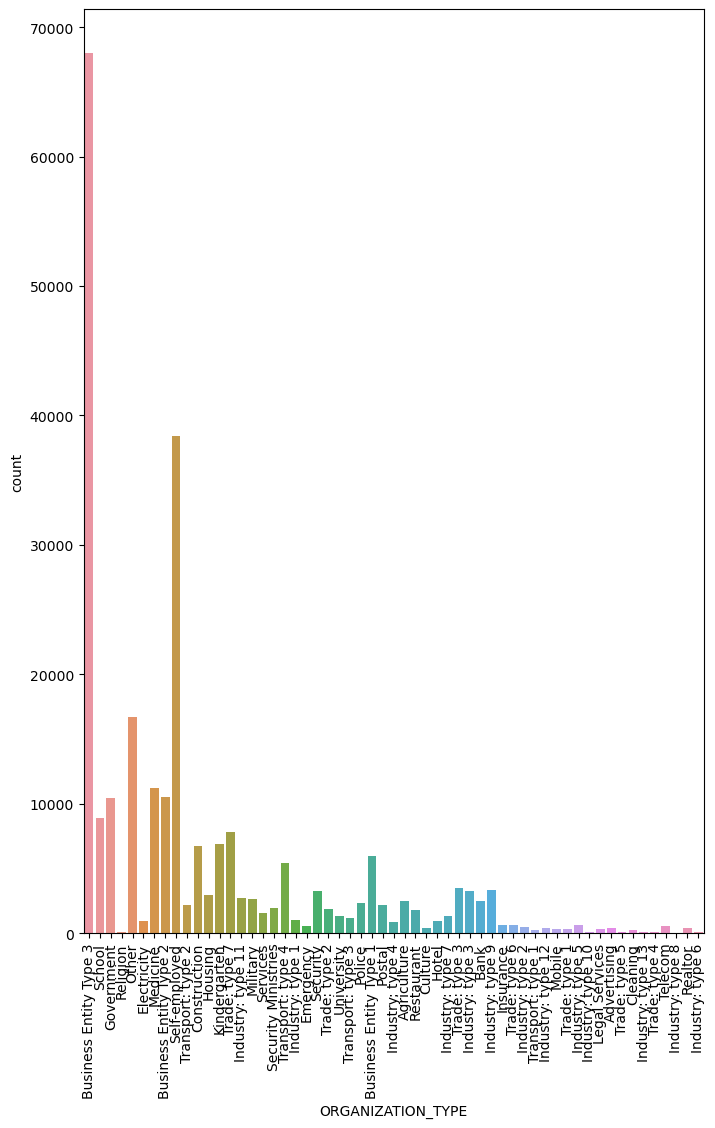

In [34]:
plt.figure(figsize=(8,12))
sns.countplot(x= 'ORGANIZATION_TYPE', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [35]:
##This research leads us to the conclusion that the column ORGANIZATION_TYPE
##has Business Enitity Type 3 and Self Employed are Top 2 organization type

In [36]:
df_1['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

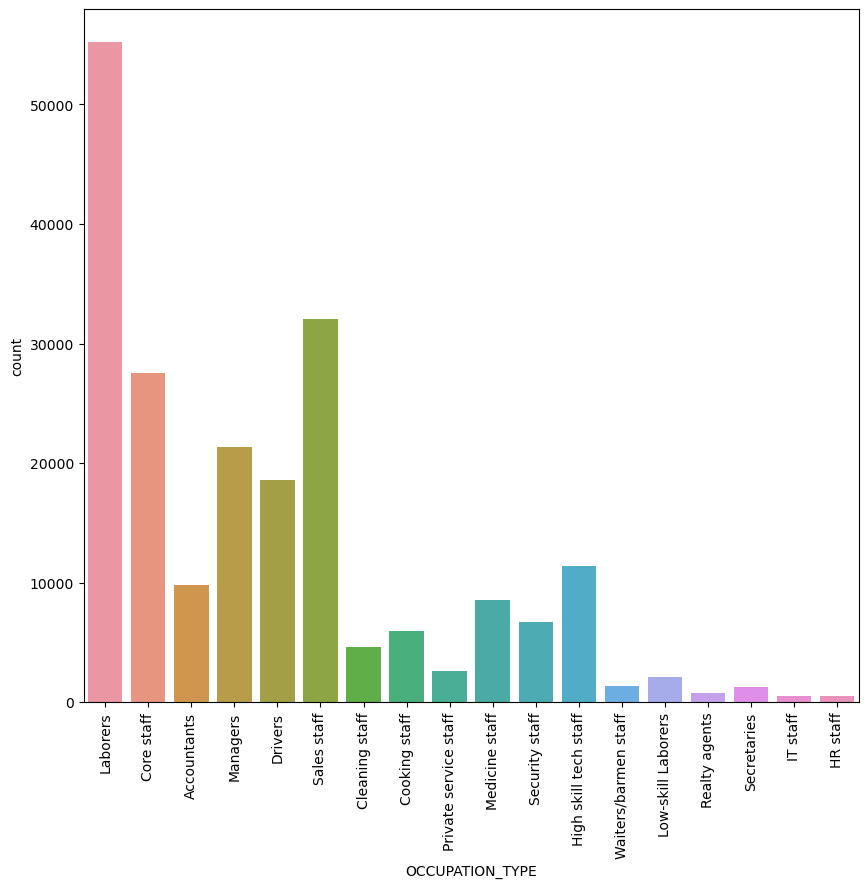

In [37]:
plt.figure(figsize=(10,9))
sns.countplot(x= 'OCCUPATION_TYPE', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [38]:
##This research leads us to the conclusion that the column OCCUPATION_TYPE
##has a large number of workers and the least quantity of IT and HR personnel.

In [39]:
df_1['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

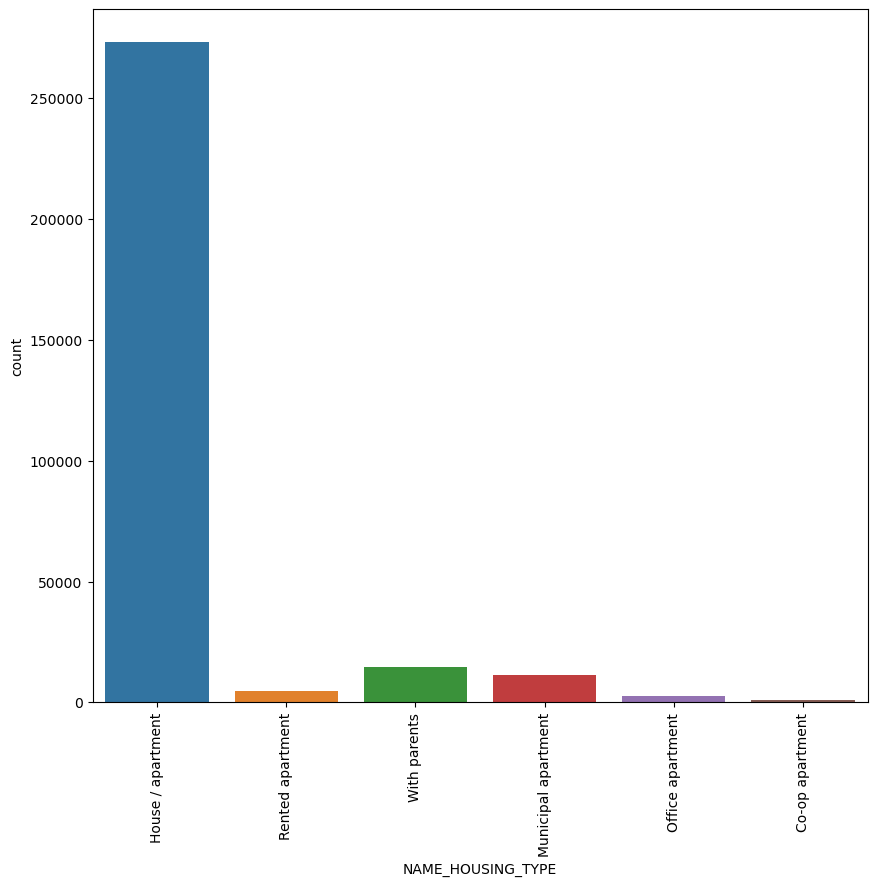

In [40]:
plt.figure(figsize=(10,9))
sns.countplot(x= 'NAME_HOUSING_TYPE', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [41]:
##This research leads us to the conclusion that the column NAME_HOUSING_TYPE
##House/Apartment is the top the Housing type.

# Evaluating and obtaining familiarity with the target variable, which is the most crucial variable for analysis.

In [42]:
df_1.TARGET.describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [43]:
df_1.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

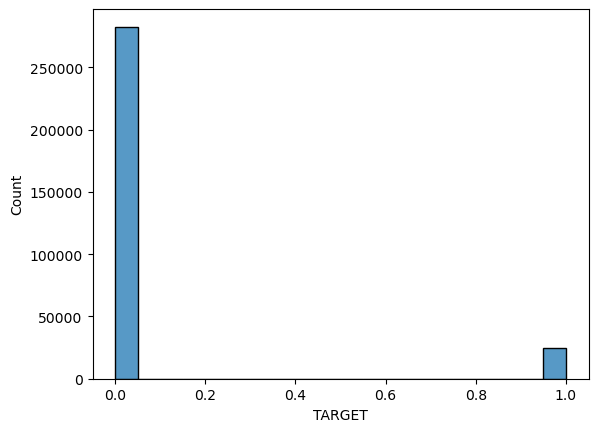

In [44]:
sns.histplot(df_1['TARGET'])
plt.show()

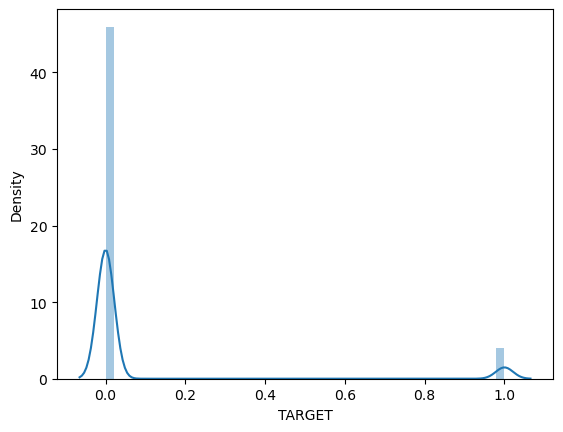

In [45]:
sns.distplot(df_1['TARGET'])
plt.show()

# IDENTIFICATION AND MANAGEMENT OF OUTLIER

In [46]:
df_1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [47]:
## NOW, if we look at each statistical value individually, we may interpret the data based on the values of the columns at the maximum percentile.
## and 75% percentile that there will undoubtedly be outliers in those columns if 75 percentile that if the difference is too big .

In [48]:
Outliers=["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

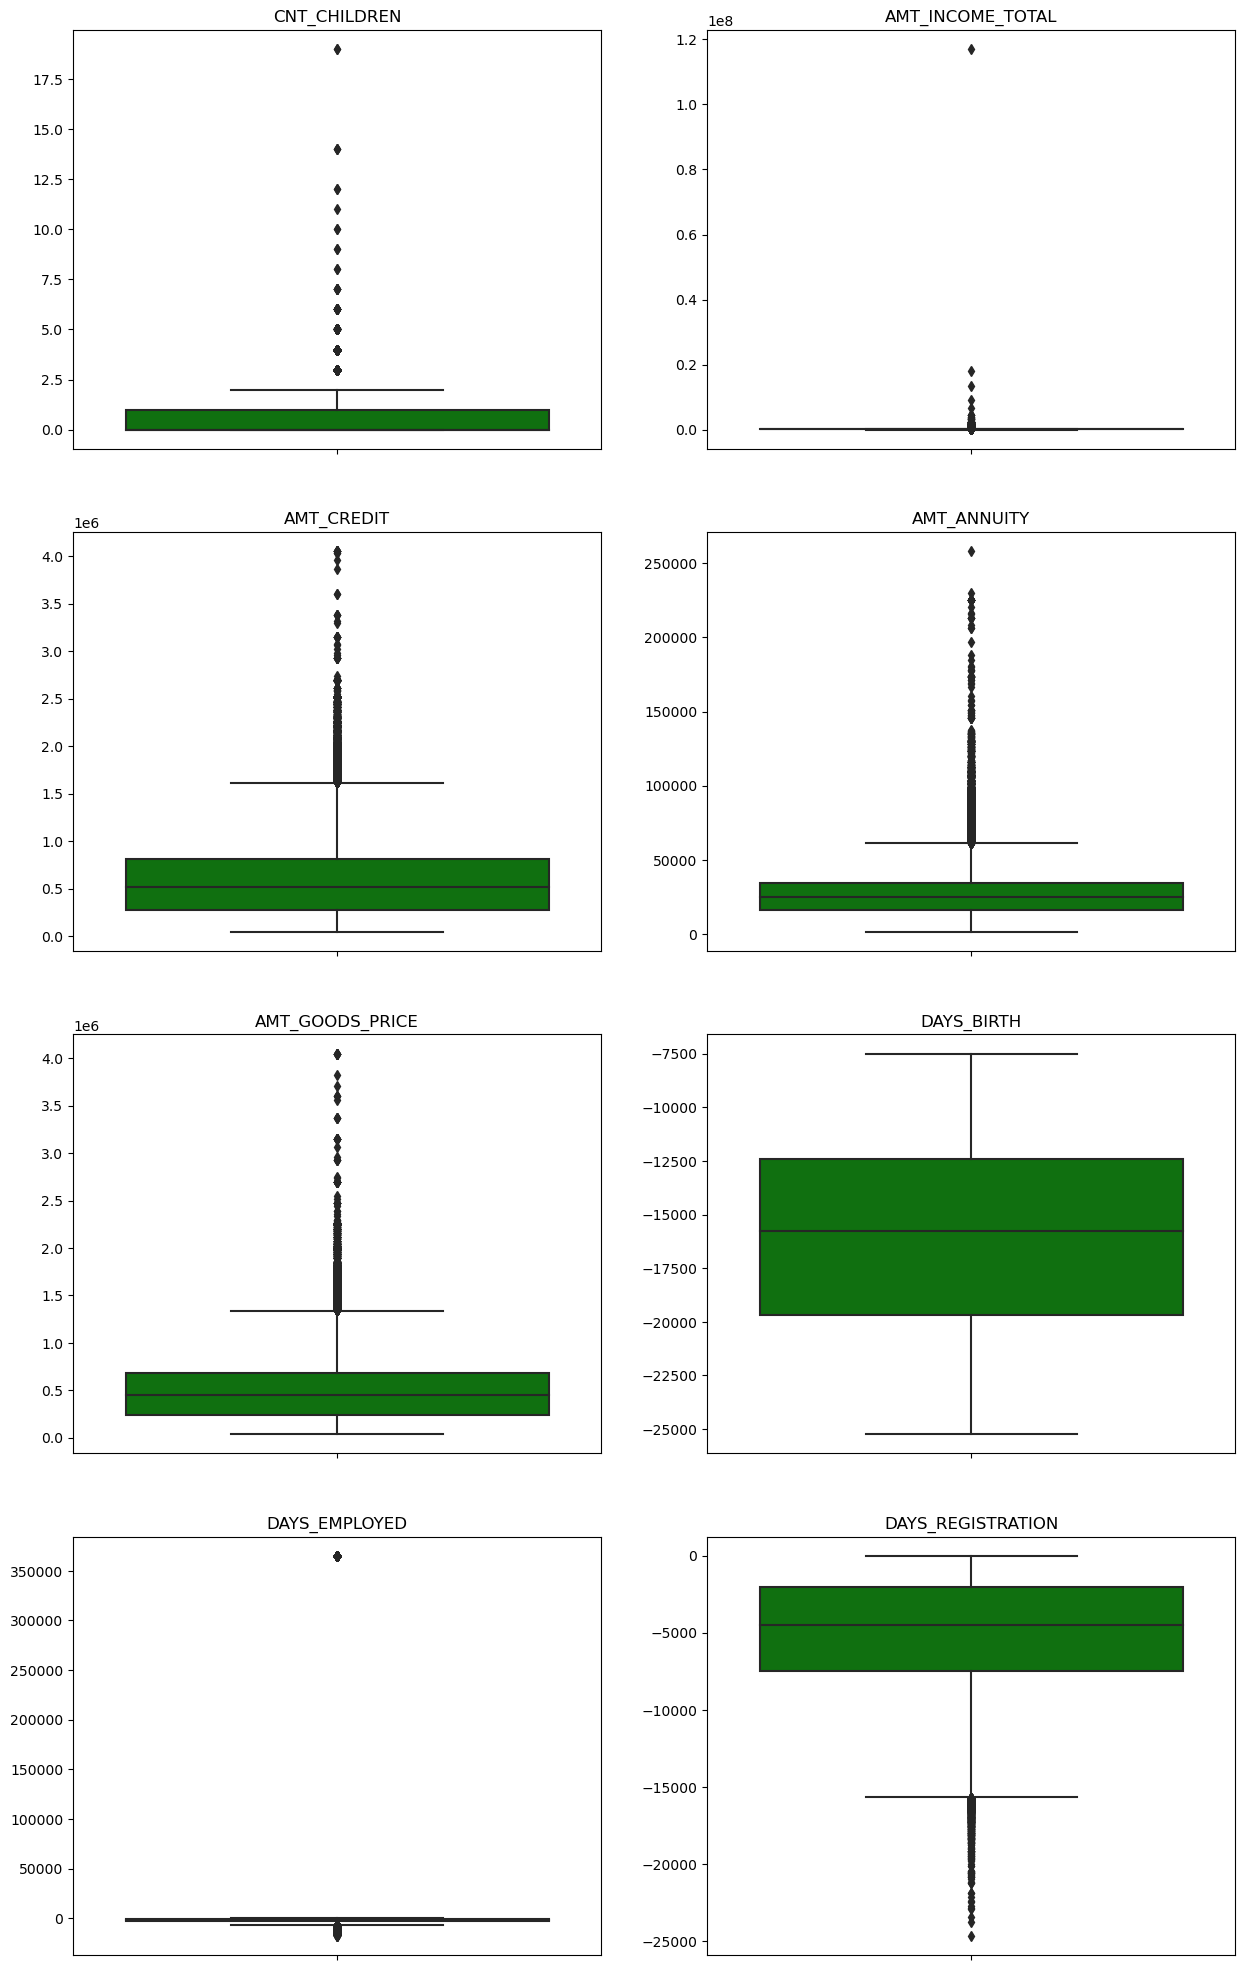

In [49]:
# Importing itertools for getting a better view in one frame without repetition
import itertools
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(Outliers, range(len(Outliers))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = df_1[i], orient = "h", color = "green")
    
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

# We can easily see that the column AMT_INCOME_TOTAL has outliers, thus we may infer this conclusion by creating another boxplot.

In [50]:
df_1.AMT_INCOME_TOTAL.value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [51]:
df_1.AMT_INCOME_TOTAL.value_counts(normalize =True)*100

135000.0    11.625600
112500.0    10.087119
157500.0     8.635789
180000.0     8.038412
90000.0      7.311283
              ...    
117324.0     0.000325
64584.0      0.000325
142897.5     0.000325
109170.0     0.000325
113062.5     0.000325
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: float64

In [52]:
df_1.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
df_1.AMT_INCOME_TOTAL.mean()

168797.9192969845

In [54]:
df_1.AMT_INCOME_TOTAL.median()

147150.0

In [55]:
df_1.AMT_INCOME_TOTAL.mode()

0    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [56]:
df_1.AMT_INCOME_TOTAL.max()

117000000.0

In [57]:
# In this case, the value is obviously out of the ordinary, indicating an outlier.


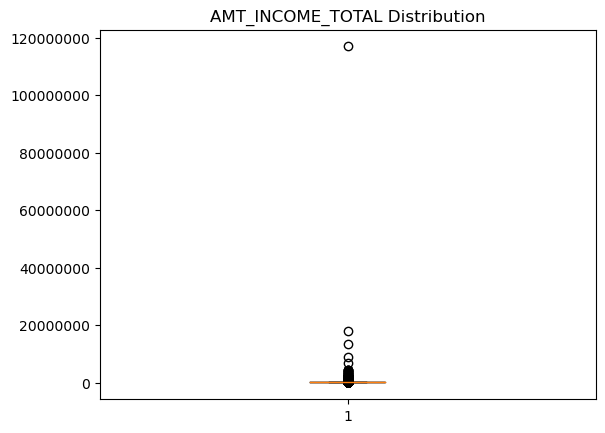

In [58]:
plt.boxplot(df_1['AMT_INCOME_TOTAL'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("AMT_INCOME_TOTAL Distribution")
plt.show()

In [59]:
## Here There is undoubtedly an outlier in this column because the maximum value is well above both the median and the 75th percentile.

# Handling of outliers by individually analyzing each of the remaining columns

# Analysis Of AMT_ANNUITY Column

In [60]:
df_1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [61]:
df_1.AMT_ANNUITY.mean()

27108.573909183444

In [62]:
df_1.AMT_ANNUITY.median()

24903.0

In [63]:
df_1.AMT_ANNUITY.mode()

0    9000.0
Name: AMT_ANNUITY, dtype: float64

In [64]:
df_1.AMT_ANNUITY.isnull().sum()

12

In [65]:
df_1.AMT_ANNUITY.max()

258025.5

In [66]:
##Since the highest value in this column is absurdly large and it is impossible to pay an AMT_ANNUITY of 258025.5, 
##the median value should be entered instead. 

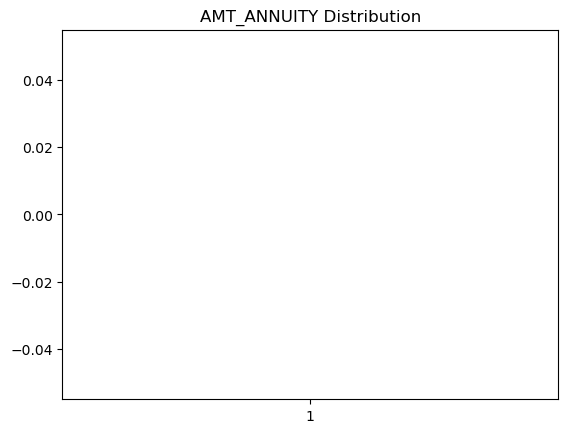

In [67]:
plt.boxplot(df_1['AMT_ANNUITY'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("AMT_ANNUITY Distribution")
plt.show()

In [68]:
FillingMissingVal=df_1['AMT_ANNUITY'].median()
df_1['AMT_ANNUITY'].fillna(value = FillingMissingVal, inplace =True)

In [69]:
df_1.AMT_ANNUITY.isnull().sum()

0

In [70]:
##This shows that the AMT_ANNUITY column is now free of outliers,
##and the median has been used to fill in the gaps left by missing data.

# The AMT_ANNUITY Column contains outliers since there is a gap between the mean and median values as well as between the 75th and highest percentile, leading to the boxplot.

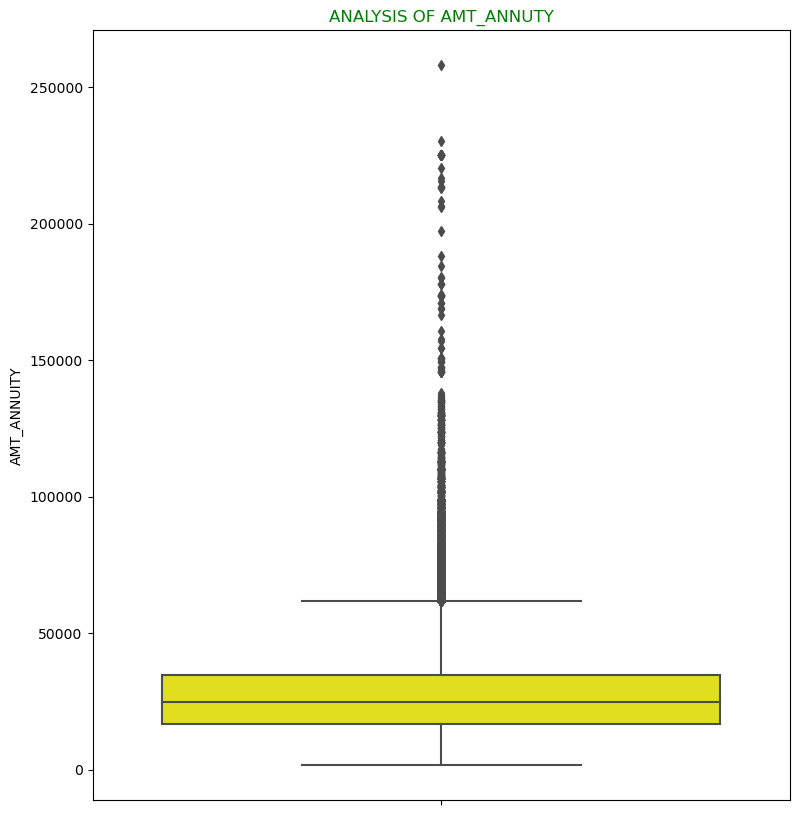

In [71]:
plt.figure(figsize=(9,10))
sns.boxplot(y=df_1['AMT_ANNUITY'],color="yellow")
plt.title("ANALYSIS OF AMT_ANNUTY",fontsize=12, color="green")
plt.show()

In [72]:
## As we can see, some days have negative values in the columns for days-of-birth and days-of-employment,
##thus we must exclude them.

In [73]:
print(df_1['DAYS_BIRTH'].unique())
print(df_1['DAYS_EMPLOYED'].unique())
print(df_1['DAYS_REGISTRATION'].unique())
print(df_1['DAYS_ID_PUBLISH'].unique())
print(df_1['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [74]:
filter_col = [col for col in df_1 if col.startswith('DAYS')]
filter_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [75]:
df_1[filter_col]= abs(df_1[filter_col])

In [76]:
print(df_1['DAYS_BIRTH'].unique())
print(df_1['DAYS_EMPLOYED'].unique())
print(df_1['DAYS_REGISTRATION'].unique())
print(df_1['DAYS_ID_PUBLISH'].unique())
print(df_1['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


# Evaluation Of Days Worked

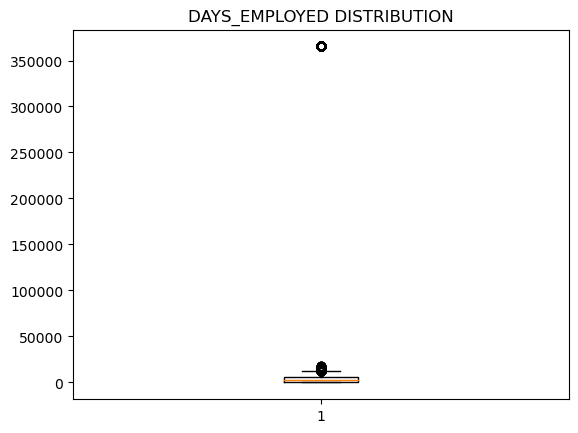

In [77]:
plt.boxplot(df_1['DAYS_EMPLOYED'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("DAYS_EMPLOYED DISTRIBUTION")
plt.show()

# Analyzing the CODE_GENDER column right now.

In [78]:
df_1['CODE_GENDER'].value_counts(dropna=False)

F      202448
M      105059
NaN         4
Name: CODE_GENDER, dtype: int64

# Value Imputation Using XNA

In [79]:
## We may include the XNA values with the female values 
##because there are only 4 XNA values and women currently make up the majority, therefore it won't have a significant influence.

In [80]:
df_1.loc[df_1['CODE_GENDER']=='NaN','CODE_GENDER']='F'
df_1['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [81]:
## We may infer from this that the XNA Values Now Include Female Values.

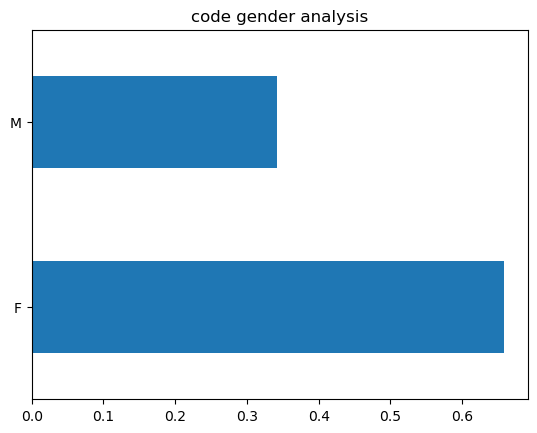

In [82]:
df_1['CODE_GENDER'].value_counts(normalize=True).plot.barh(title='code gender analysis')
plt.show()

In [83]:
df_1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

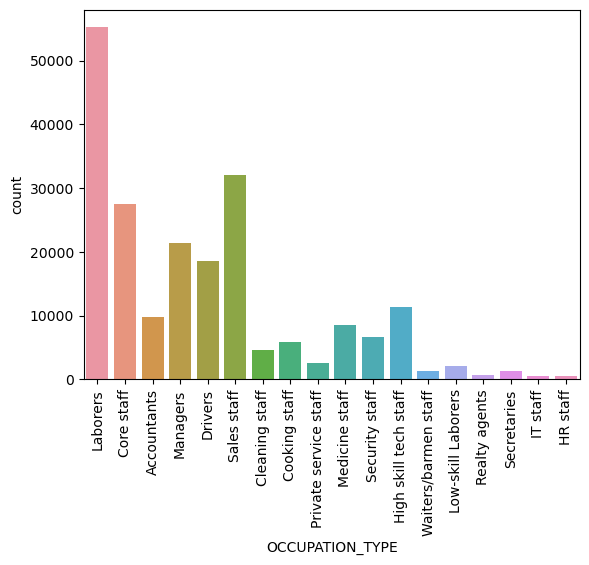

In [84]:
sns.countplot(x= 'OCCUPATION_TYPE', data=df_1)
plt.xticks(rotation=90)
plt.show()
# From the analysis of OCCUPATION_TYPE we can 

In [85]:
df_1[['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL']].describe()

AMT_ANNUITY    AMT_CREDIT  AMT_INCOME_TOTAL
count  307511.000000  3.075110e+05      3.075110e+05
mean    27108.487841  5.990260e+05      1.687979e+05
std     14493.461065  4.024908e+05      2.371231e+05
min      1615.500000  4.500000e+04      2.565000e+04
25%     16524.000000  2.700000e+05      1.125000e+05
50%     24903.000000  5.135310e+05      1.471500e+05
75%     34596.000000  8.086500e+05      2.025000e+05
max    258025.500000  4.050000e+06      1.170000e+08

# The CNT_FAM_MEMBERS column is examined

In [86]:
df_1.CNT_FAM_MEMBERS.describe

<bound method NDFrame.describe of 0         1.0
1         2.0
2         1.0
3         2.0
4         1.0
         ... 
307506    1.0
307507    1.0
307508    1.0
307509    2.0
307510    2.0
Name: CNT_FAM_MEMBERS, Length: 307511, dtype: float64>

In [87]:
df_1.CNT_FAM_MEMBERS.value_counts(dropna=False)

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
NaN          2
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [88]:
df_1.CNT_FAM_MEMBERS.mean()

2.152665450442101

In [89]:
df_1.CNT_FAM_MEMBERS.median()

2.0

In [90]:
df_1.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [91]:
## Plotting the columns into a boxplot to look for outliers and learn from them.

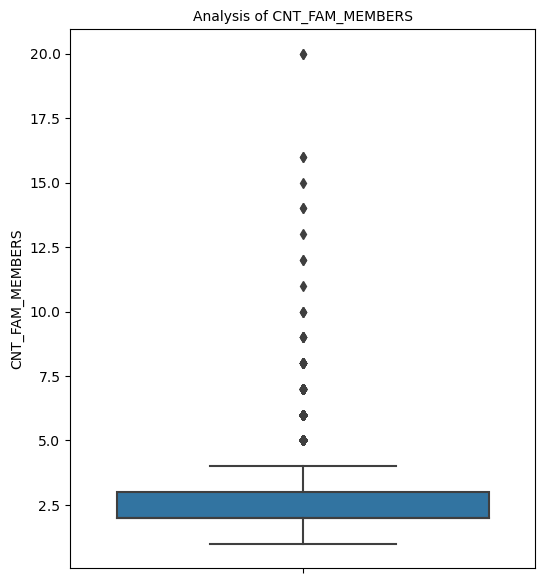

In [92]:
plt.figure(figsize=(6,7))
sns.boxplot(y=df_1['CNT_FAM_MEMBERS'])
plt.title("Analysis of CNT_FAM_MEMBERS",fontsize=10)
plt.show()

# examining the CNT_FAM_MEMBERS column's missing values

In [93]:
df_1.CNT_FAM_MEMBERS.isnull().sum()

2

In [94]:
fillingMissingVal=df_1['CNT_FAM_MEMBERS'].median()
df_1['CNT_FAM_MEMBERS'].fillna(value=fillingMissingVal,inplace =True)

In [95]:
df_1.CNT_FAM_MEMBERS.isnull().sum()

0

# Evaluation of the Column AMT_REQ_CREDIT_BUREAU_DAY

In [96]:
df_1.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(dropna=False)

0.0    264503
NaN     41519
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [97]:
df_1.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [98]:
## We should use boxplots since the large discrepancy between the 75th percentile 
##and the maximum percentile suggests that this column contains outliers.

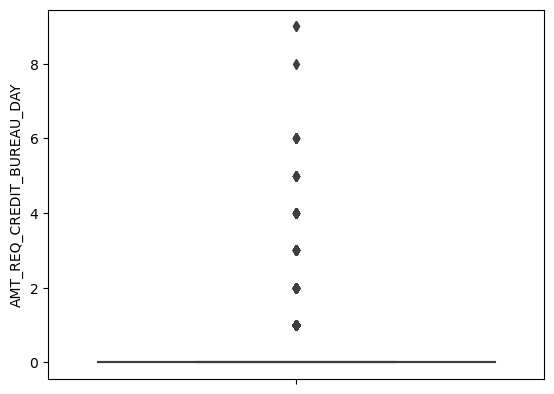

In [99]:
sns.boxplot(y=df_1['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

# In order to compute the imbalance % and gain some insights from it, the target variable is now being converted into two separate dataframes with the values of target ==0 and target==1.

In [100]:
df_1['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [101]:
target_0=df_1[df_1['TARGET']==0]
target_1=df_1[df_1['TARGET']==1]

# examining the DATA IMBALANCE

# By creating a pie chart and segmenting the target column into sections for defaulters and non-defaulters, we can now check for imbalance.

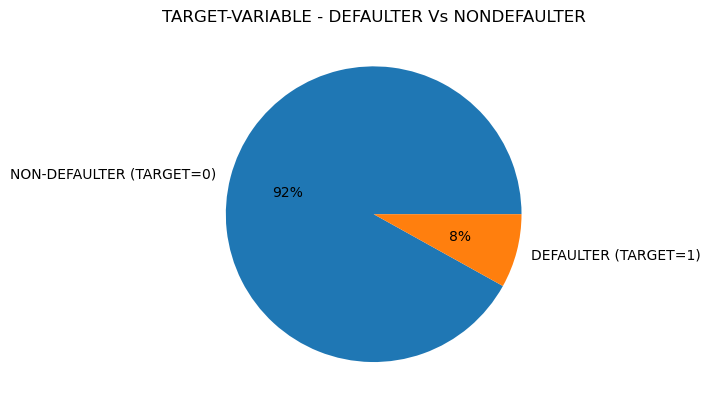

In [102]:
plt.pie(df_1['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULTER (TARGET=0)','DEFAULTER (TARGET=1)'],autopct='%1.f%%')
plt.title('TARGET-VARIABLE - DEFAULTER Vs NONDEFAULTER')
plt.show()

In [103]:
## From this, we might infer that there are far more non-defaulters than defaulters. There is so undoubtedly an imbalance. 

# Since there are 8% of defaulters and 92% of non-defaulters, there is data imbalance present here, hence the imbalance percentage was calculated based on that.

In [104]:
Imbalan=round(len(target_0)/len(target_1),2)
Imbalan

11.39

In [105]:
## We can estimate that there are about 11 data imbalances after computing the data imbalance percentage. 

# Now using a heatmap, analyze the target0 and target1 variables to see if there is any correlation between them.

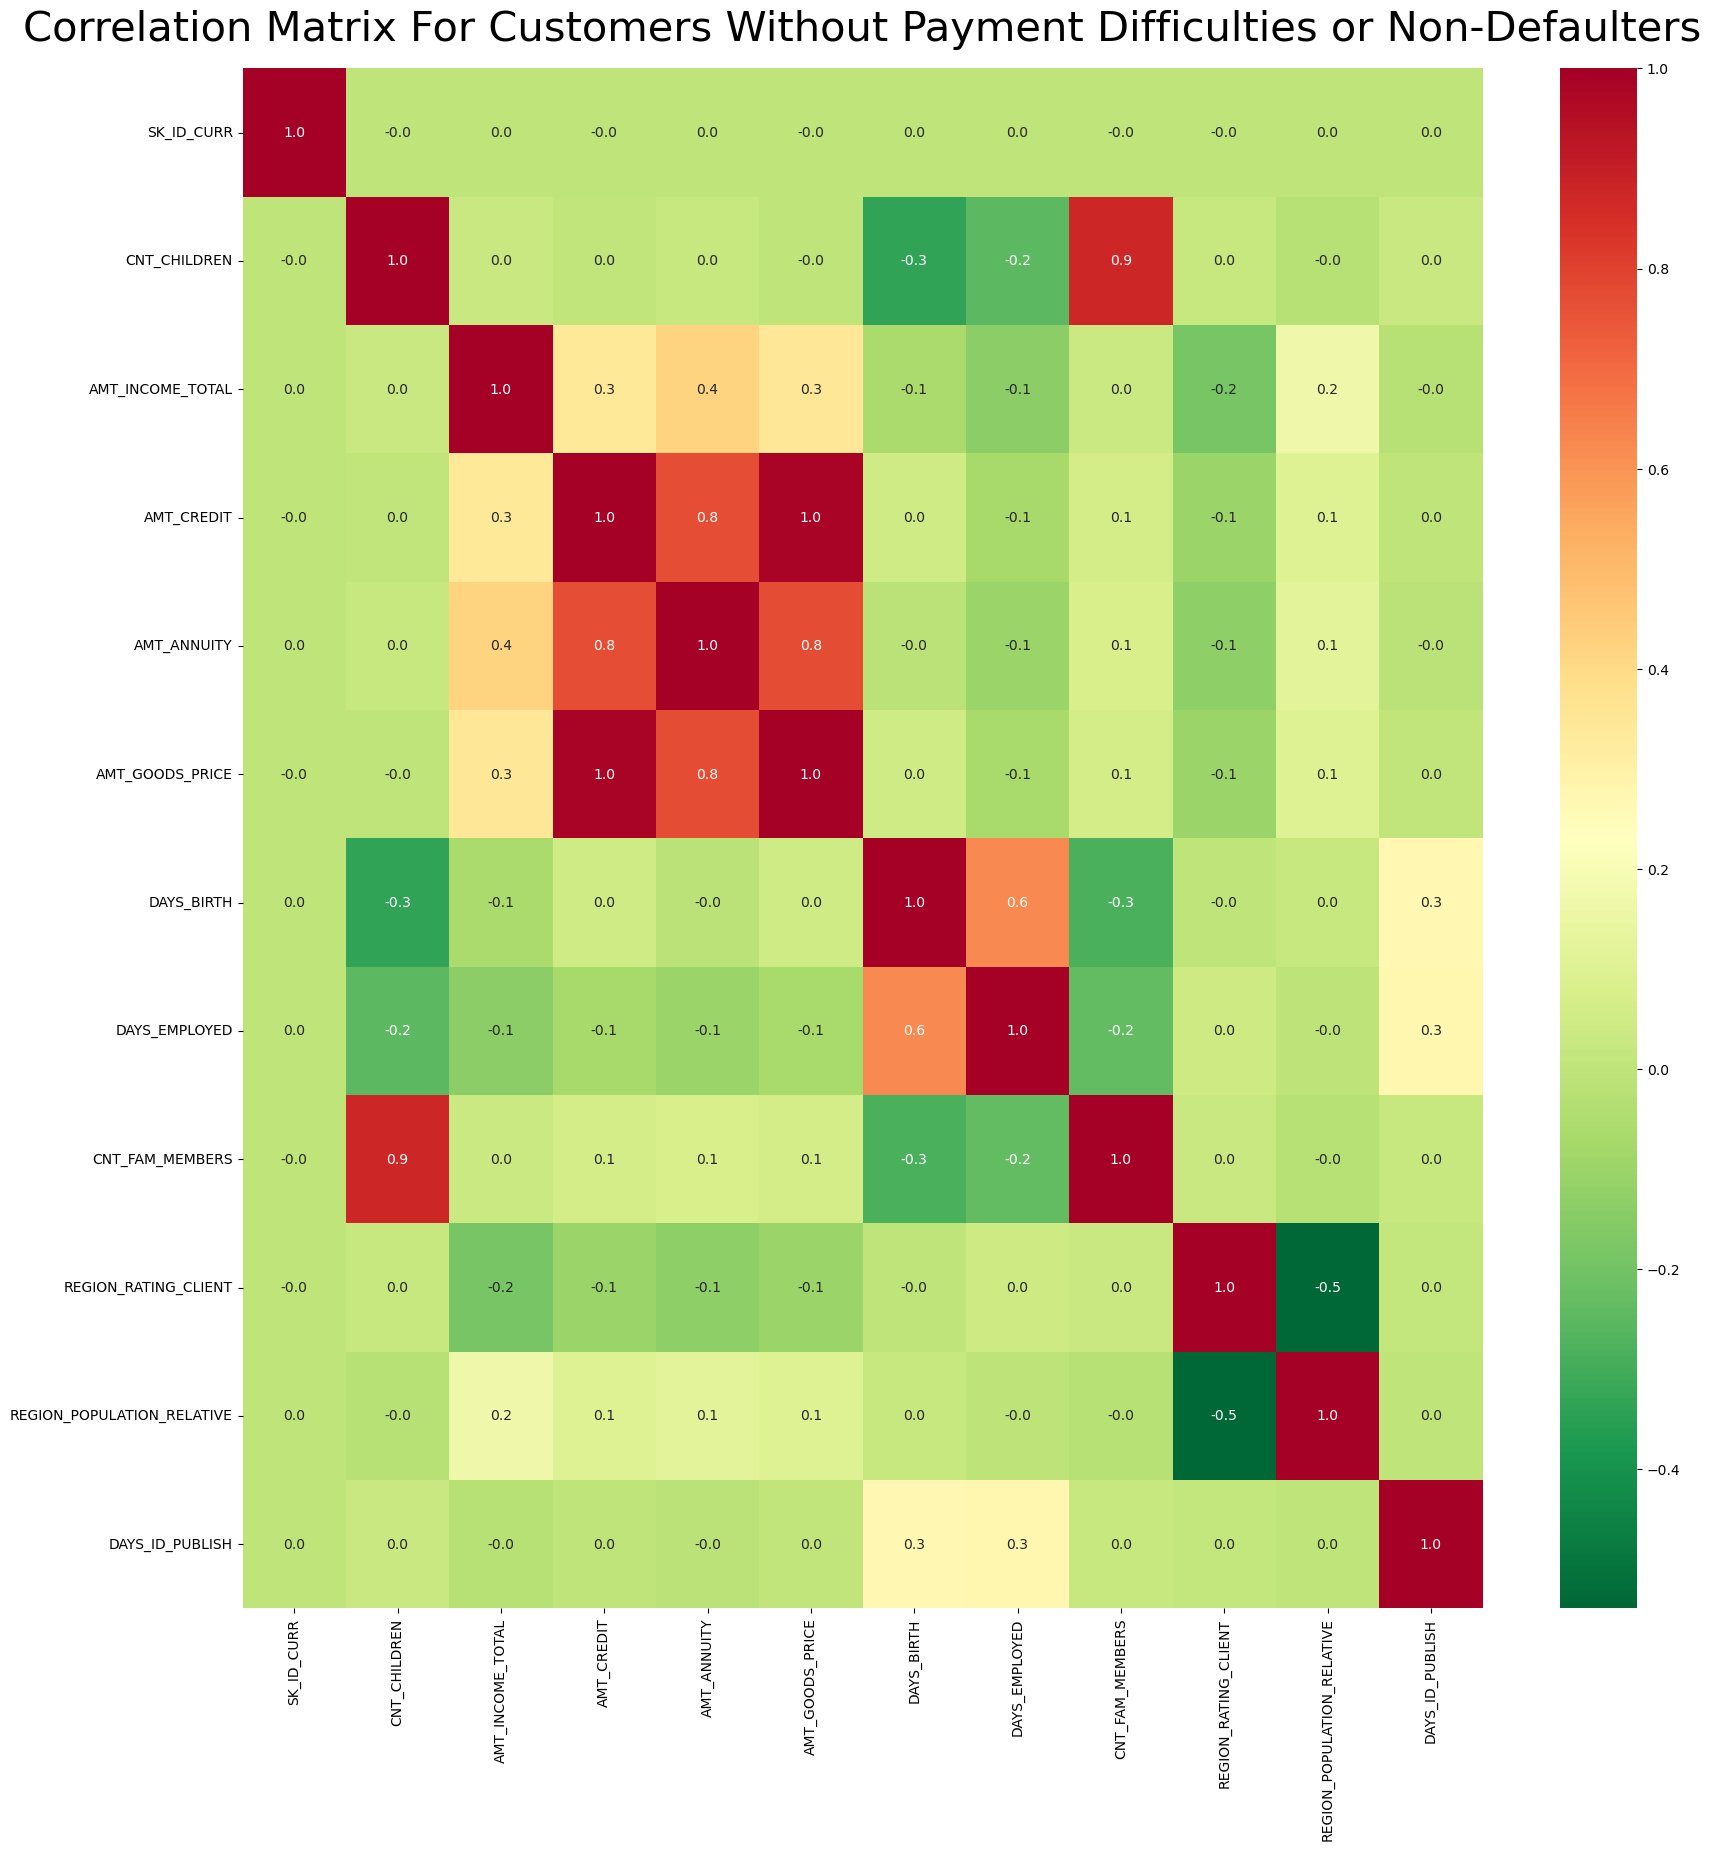

In [106]:
c=target_0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
plt.figure(figsize=(20,20))
sns.heatmap(c.corr(), fmt='.1f', cmap="RdYlGn_r", annot=True)
plt.title("Correlation Matrix For Customers Without Payment Difficulties or Non-Defaulters",fontsize=30, pad=20 )
plt.show()

In [107]:
df_1[["AMT_CREDIT", "AMT_ANNUITY", "AMT_INCOME_TOTAL"]].corr()

AMT_CREDIT  AMT_ANNUITY  AMT_INCOME_TOTAL
AMT_CREDIT          1.000000     0.770127          0.156870
AMT_ANNUITY         0.770127     1.000000          0.191657
AMT_INCOME_TOTAL    0.156870     0.191657          1.000000

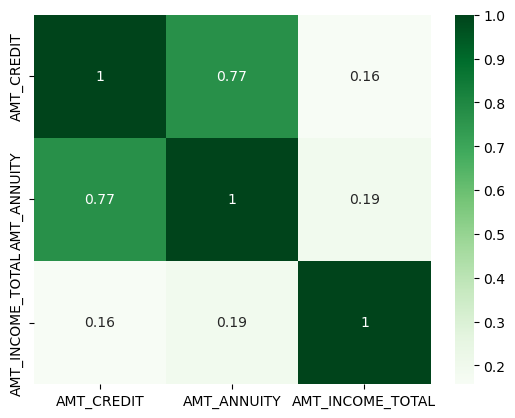

In [108]:
sns.heatmap(df_1[["AMT_CREDIT", "AMT_ANNUITY", "AMT_INCOME_TOTAL"]].corr(), annot=True,cmap="Greens")
plt.show()

In [109]:
## We may conclude that all of these columns are positively associated to one another after plotting the correlation matrix.

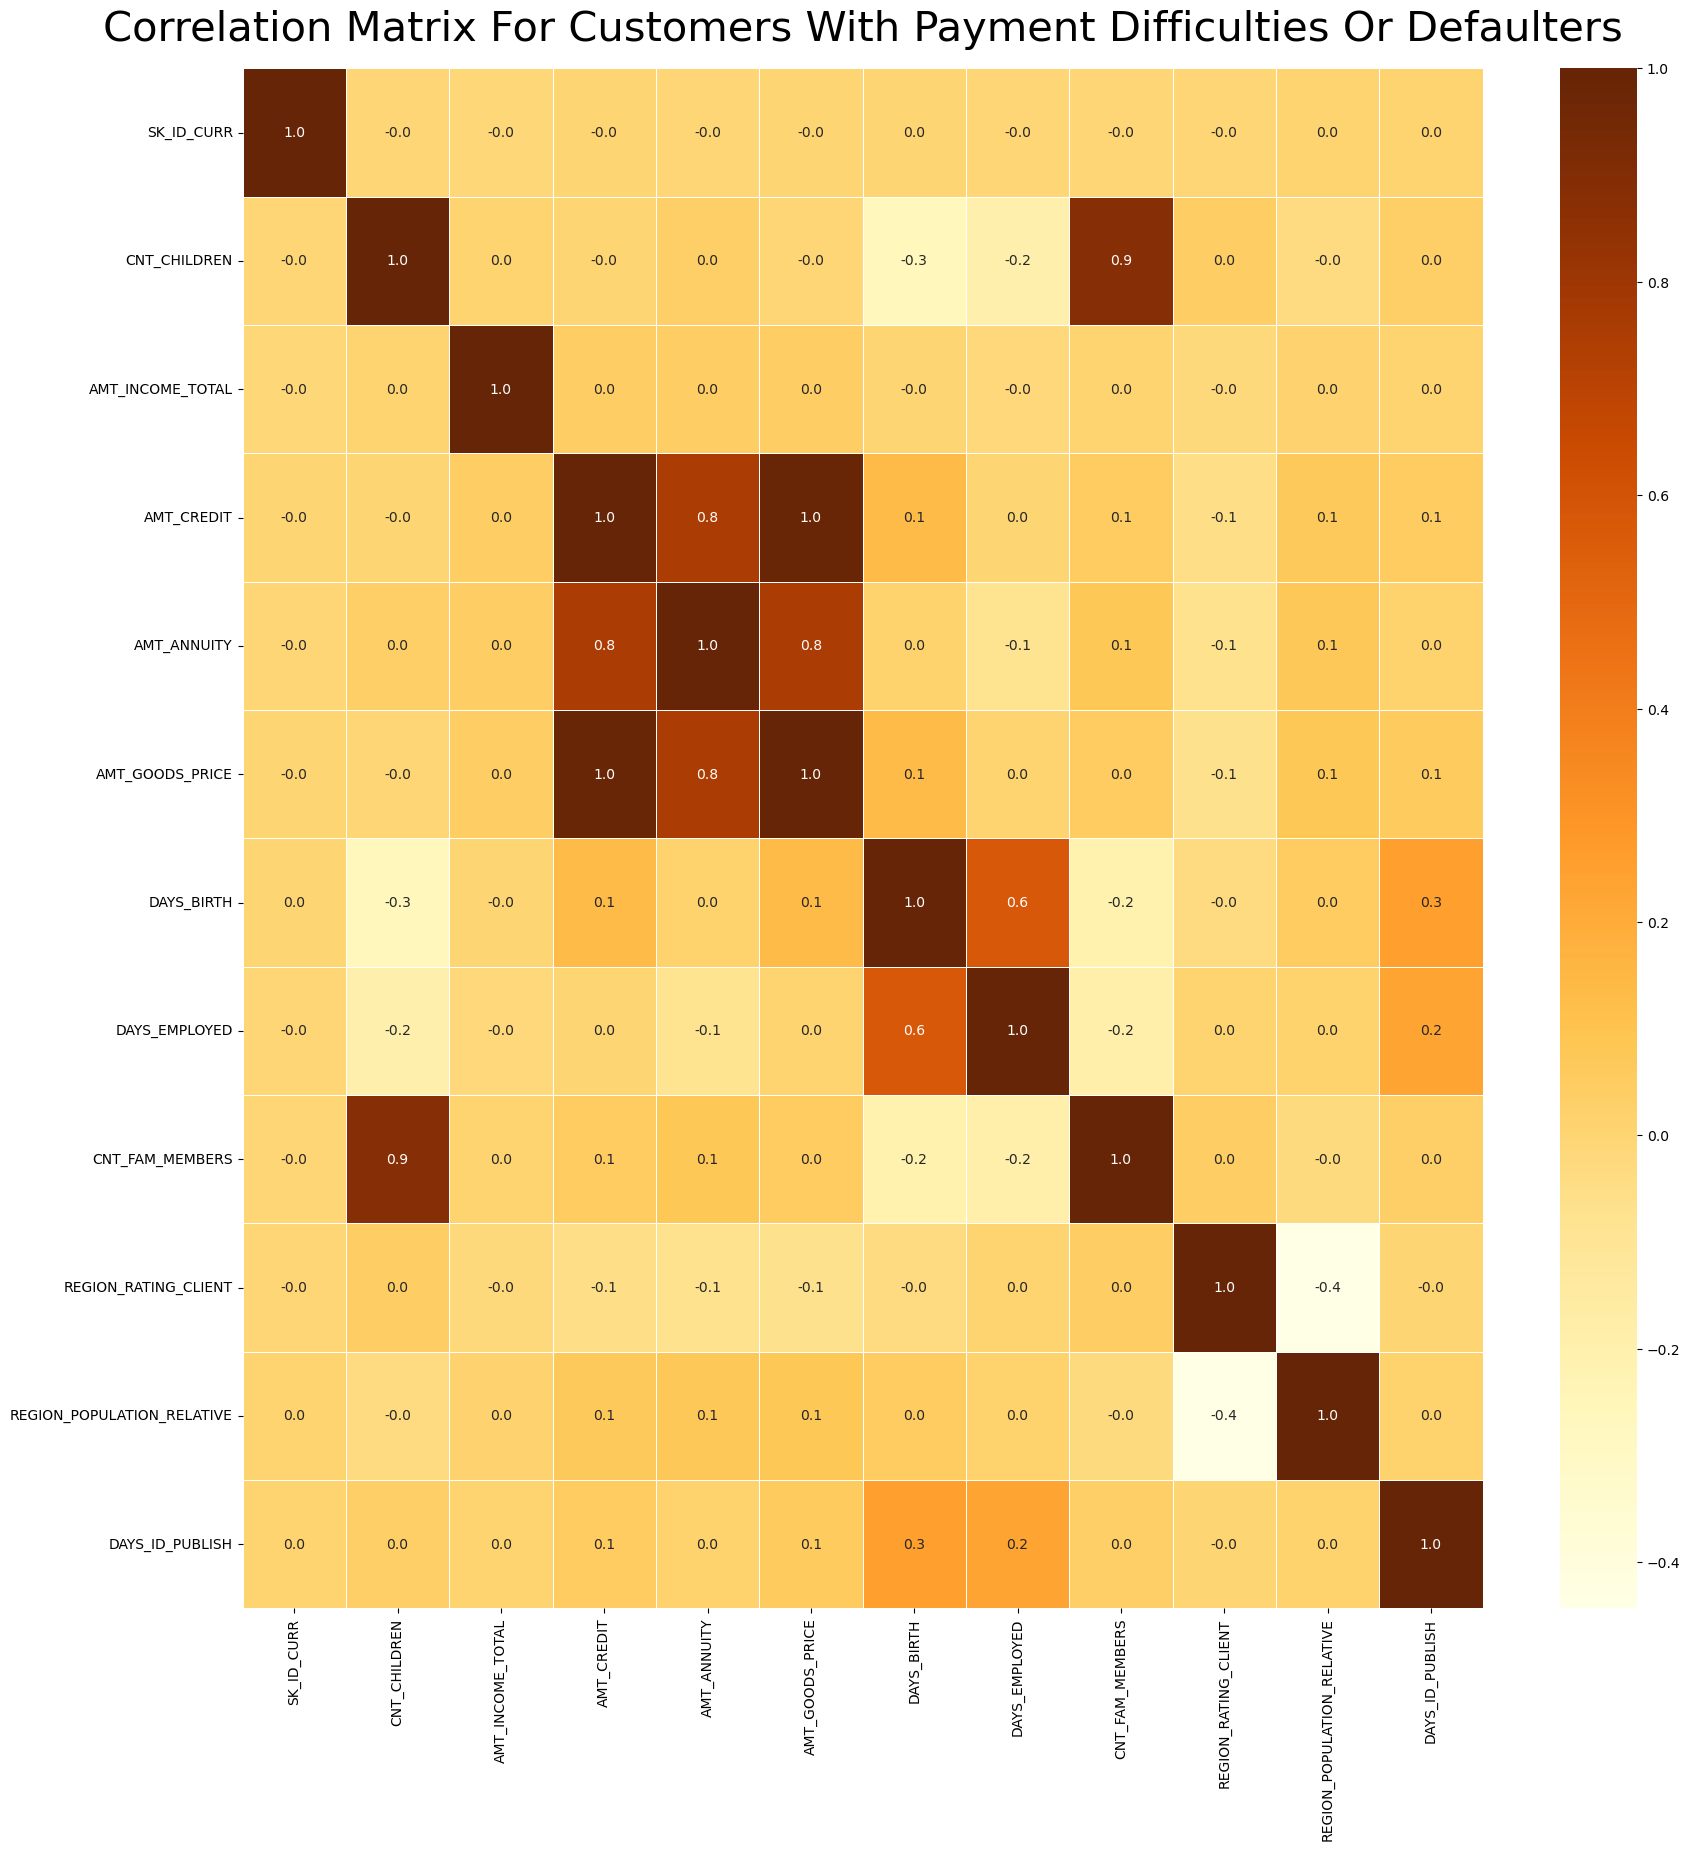

In [110]:
v=target_1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(v.corr(), annot=True, fmt='.1f',cmap="YlOrBr", linewidths=.5, ax=ax)
plt.title("Correlation Matrix For Customers With Payment Difficulties Or Defaulters",fontsize=30, pad=20 )
plt.show()

# The following results were reached after charting the correlation matrix for the target variable 0,1 or non defaulters and defaulters.

In [111]:
## The connection between the columns AMT_ANNUITY, AMT_CREDIT, and AMT_GOODS_PRICE is quite strong i.e. highly correlated
## The variables DAYS_BIRTH, DAYS_EMPLOYED, and CNT_FAM_MEMBERS are also somewhat correlated.

# Univariate Analysis

# Univariate Analysis Of WEEKDAY_APPR_PROCESS_START¶


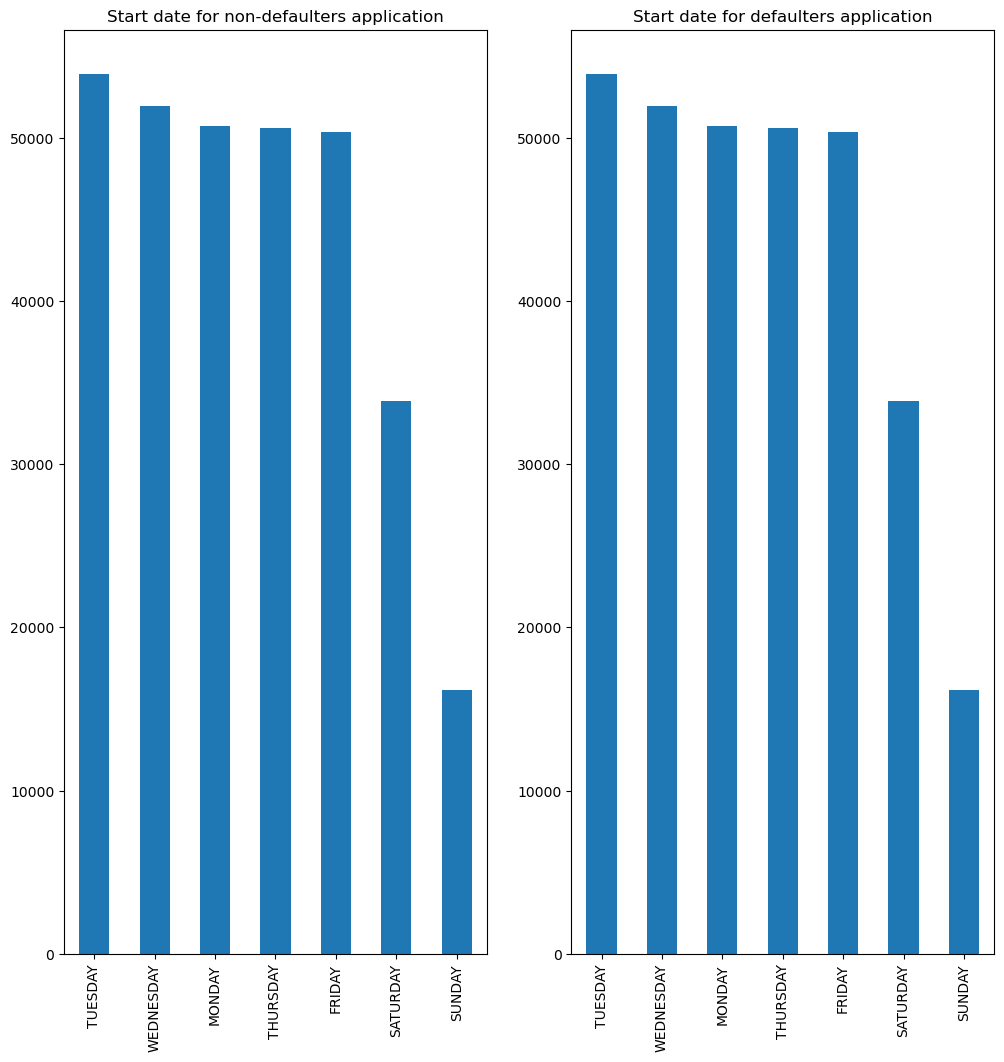

In [112]:
plt.figure(figsize=[12,12])
plt.subplot(1,2,1)
PR_0=df_1.WEEKDAY_APPR_PROCESS_START.value_counts().plot.bar()
PR_0.title.set_text('Start date for non-defaulters application')


plt.subplot(1,2,2)
PR_1=df_1.WEEKDAY_APPR_PROCESS_START.value_counts().plot.bar()
PR_1.title.set_text('Start date for defaulters application')

# Gender Code Analysis in One Variable

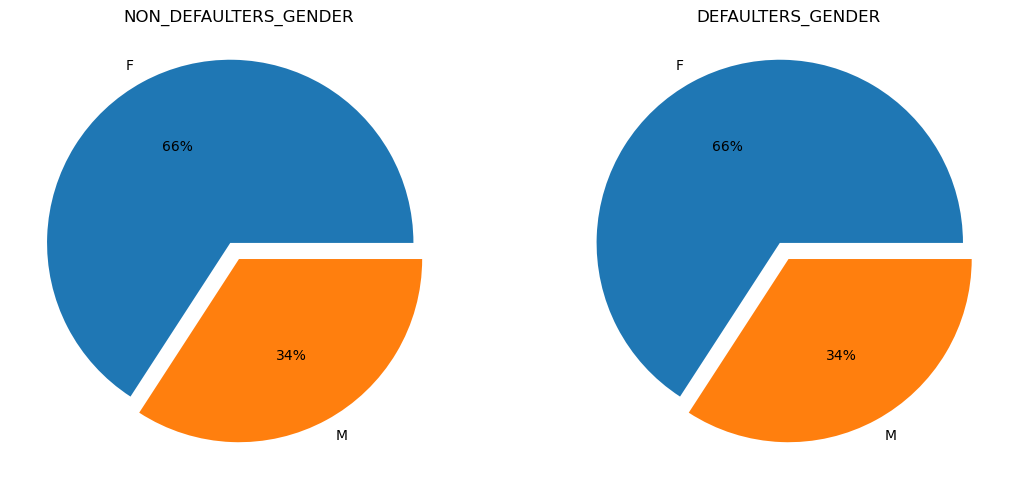

In [113]:
plt.figure(figsize=[13,13])
plt.subplot(1,2,1)
GEND_0=df_1.CODE_GENDER.value_counts().plot.pie(label="", explode =[0.1, 0],autopct='%1.0f%%')
GEND_0.title.set_text('NON_DEFAULTERS_GENDER')


plt.subplot(1,2,2)
GEND_1=df_1.CODE_GENDER.value_counts().plot.pie(label="",explode=[0.1,0], autopct='%1.0f%%')
GEND_1.title.set_text('DEFAULTERS_GENDER')


In [114]:
## Conclusion: A significant number of women are present in both situations.
## We can easily observe that both distributions have a significant proportion of females,
##which draws attention to the imbalance in the data.

# NAME_CONTRACT_TYPE in one variable

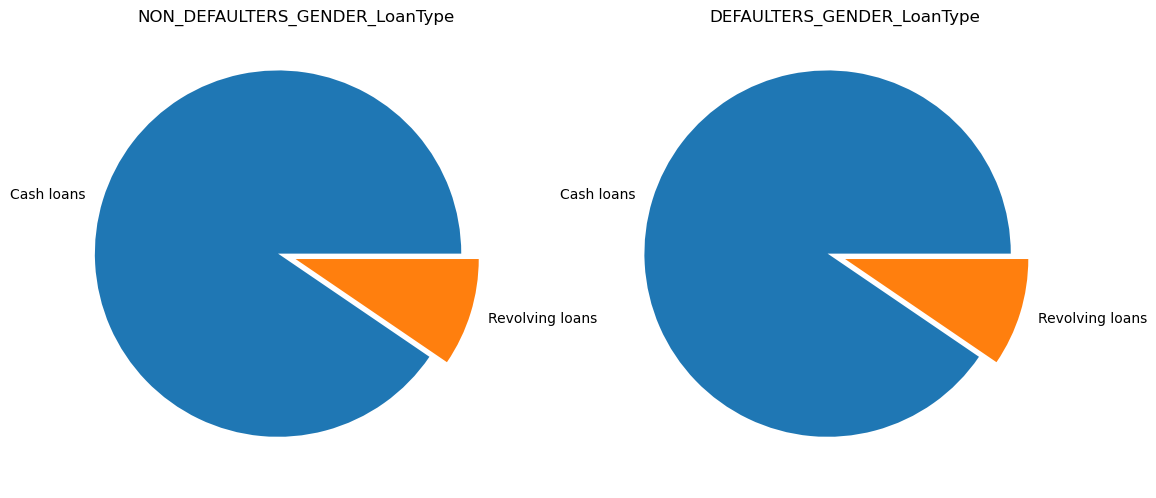

In [115]:
plt.figure(figsize=[13,13])
plt.subplot(1,2,1)
ct_0=df_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie(label="", explode =[0.1, 0])
ct_0.title.set_text('NON_DEFAULTERS_GENDER_LoanType')
plt.yticks(rotation=270)                                                                                
                                                                                                                                                                
plt.subplot(1,2,2)
ct_1=df_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie(label="",explode=[0.1,0])
ct_1.title.set_text('DEFAULTERS_GENDER_LoanType')
plt.show()

In [116]:
## Conclusion: Compared to revolving loans, cash loans are in great demand and have a higher interest rate.

# Categorical Features

In [117]:
df_1.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

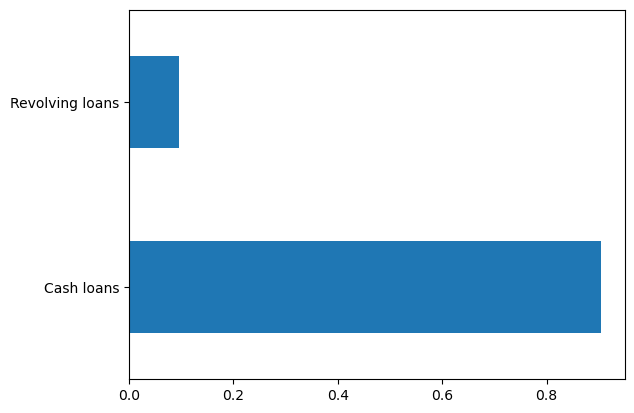

In [118]:
df_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

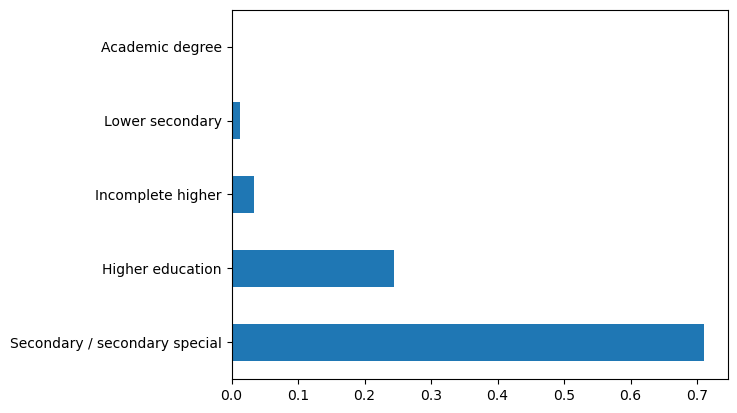

In [119]:
df_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

In [120]:
## Conclusion: People with secondary degrees are more likely to take out loans.

In [121]:
df_1.CODE_GENDER.value_counts(normalize=True)

F    0.658352
M    0.341648
Name: CODE_GENDER, dtype: float64

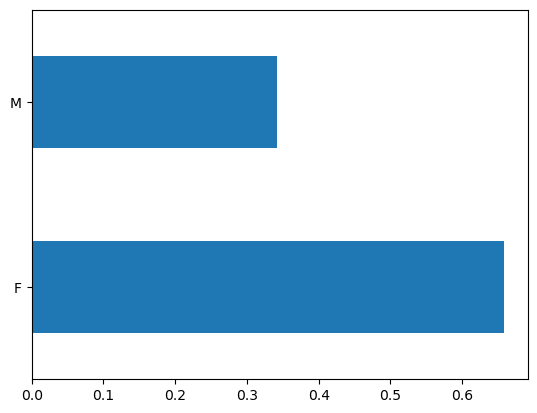

In [122]:
df_1.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()

# Analysing  Name Housing Type 

In [123]:
df_1.NAME_HOUSING_TYPE.describe()

count                307511
unique                    6
top       House / apartment
freq                 272868
Name: NAME_HOUSING_TYPE, dtype: object

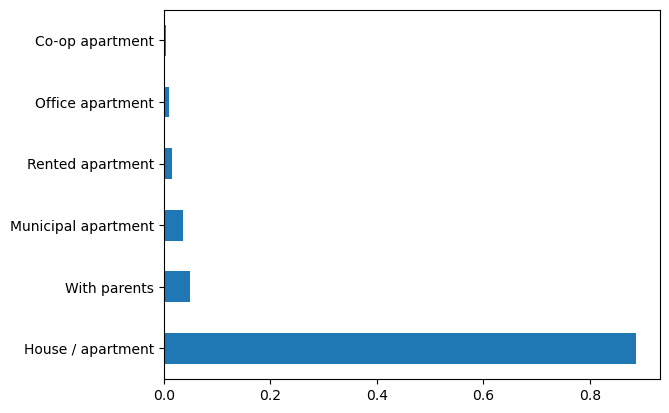

In [124]:
df_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

In [125]:
target0 = df_1.loc[df_1["TARGET"]==0]

target1 = df_1.loc[df_1["TARGET"]==1]

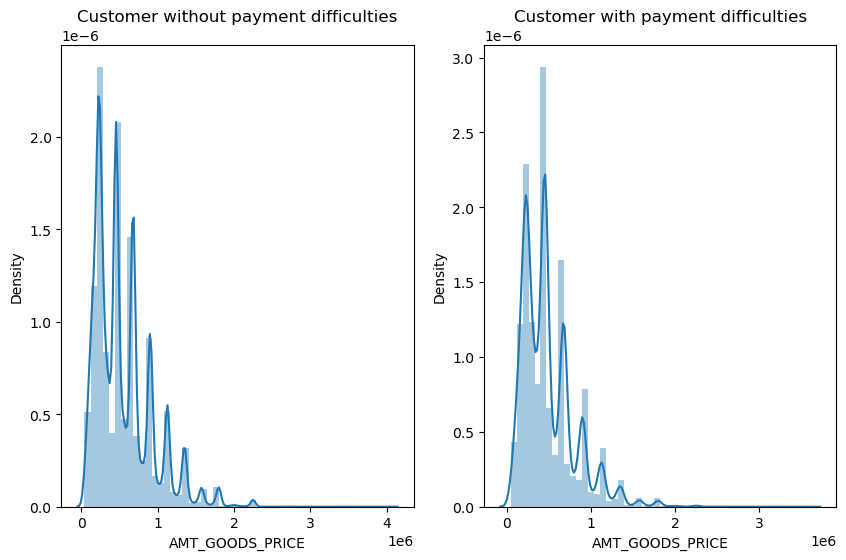

In [126]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(target_0['AMT_GOODS_PRICE'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.distplot(target_1['AMT_GOODS_PRICE'])
plt.title('Customer with payment difficulties')
plt.show()

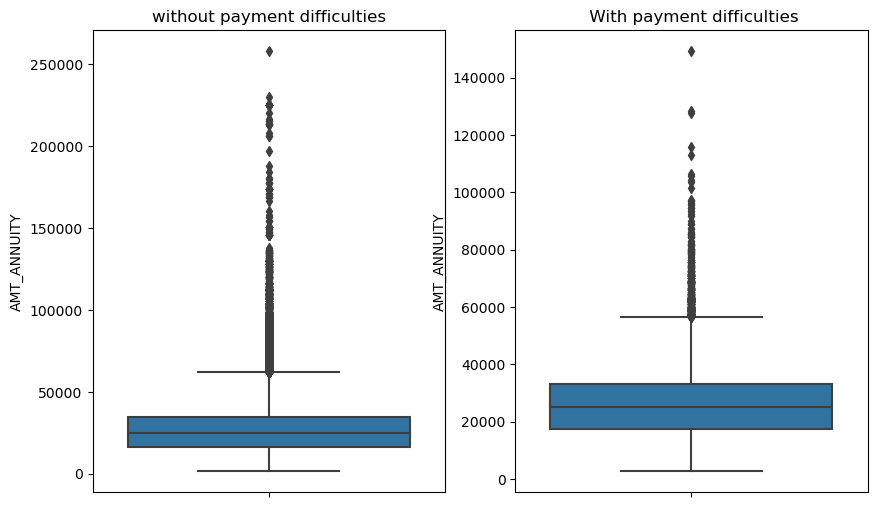

In [127]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=target_0['AMT_ANNUITY'])
plt.title('without payment difficulties')


plt.subplot(1,2,2)
sns.boxplot(y=target_1['AMT_ANNUITY'])
plt.title(' With payment difficulties')
plt.show()

# Continuous Variables Underwent Univariate Analysis

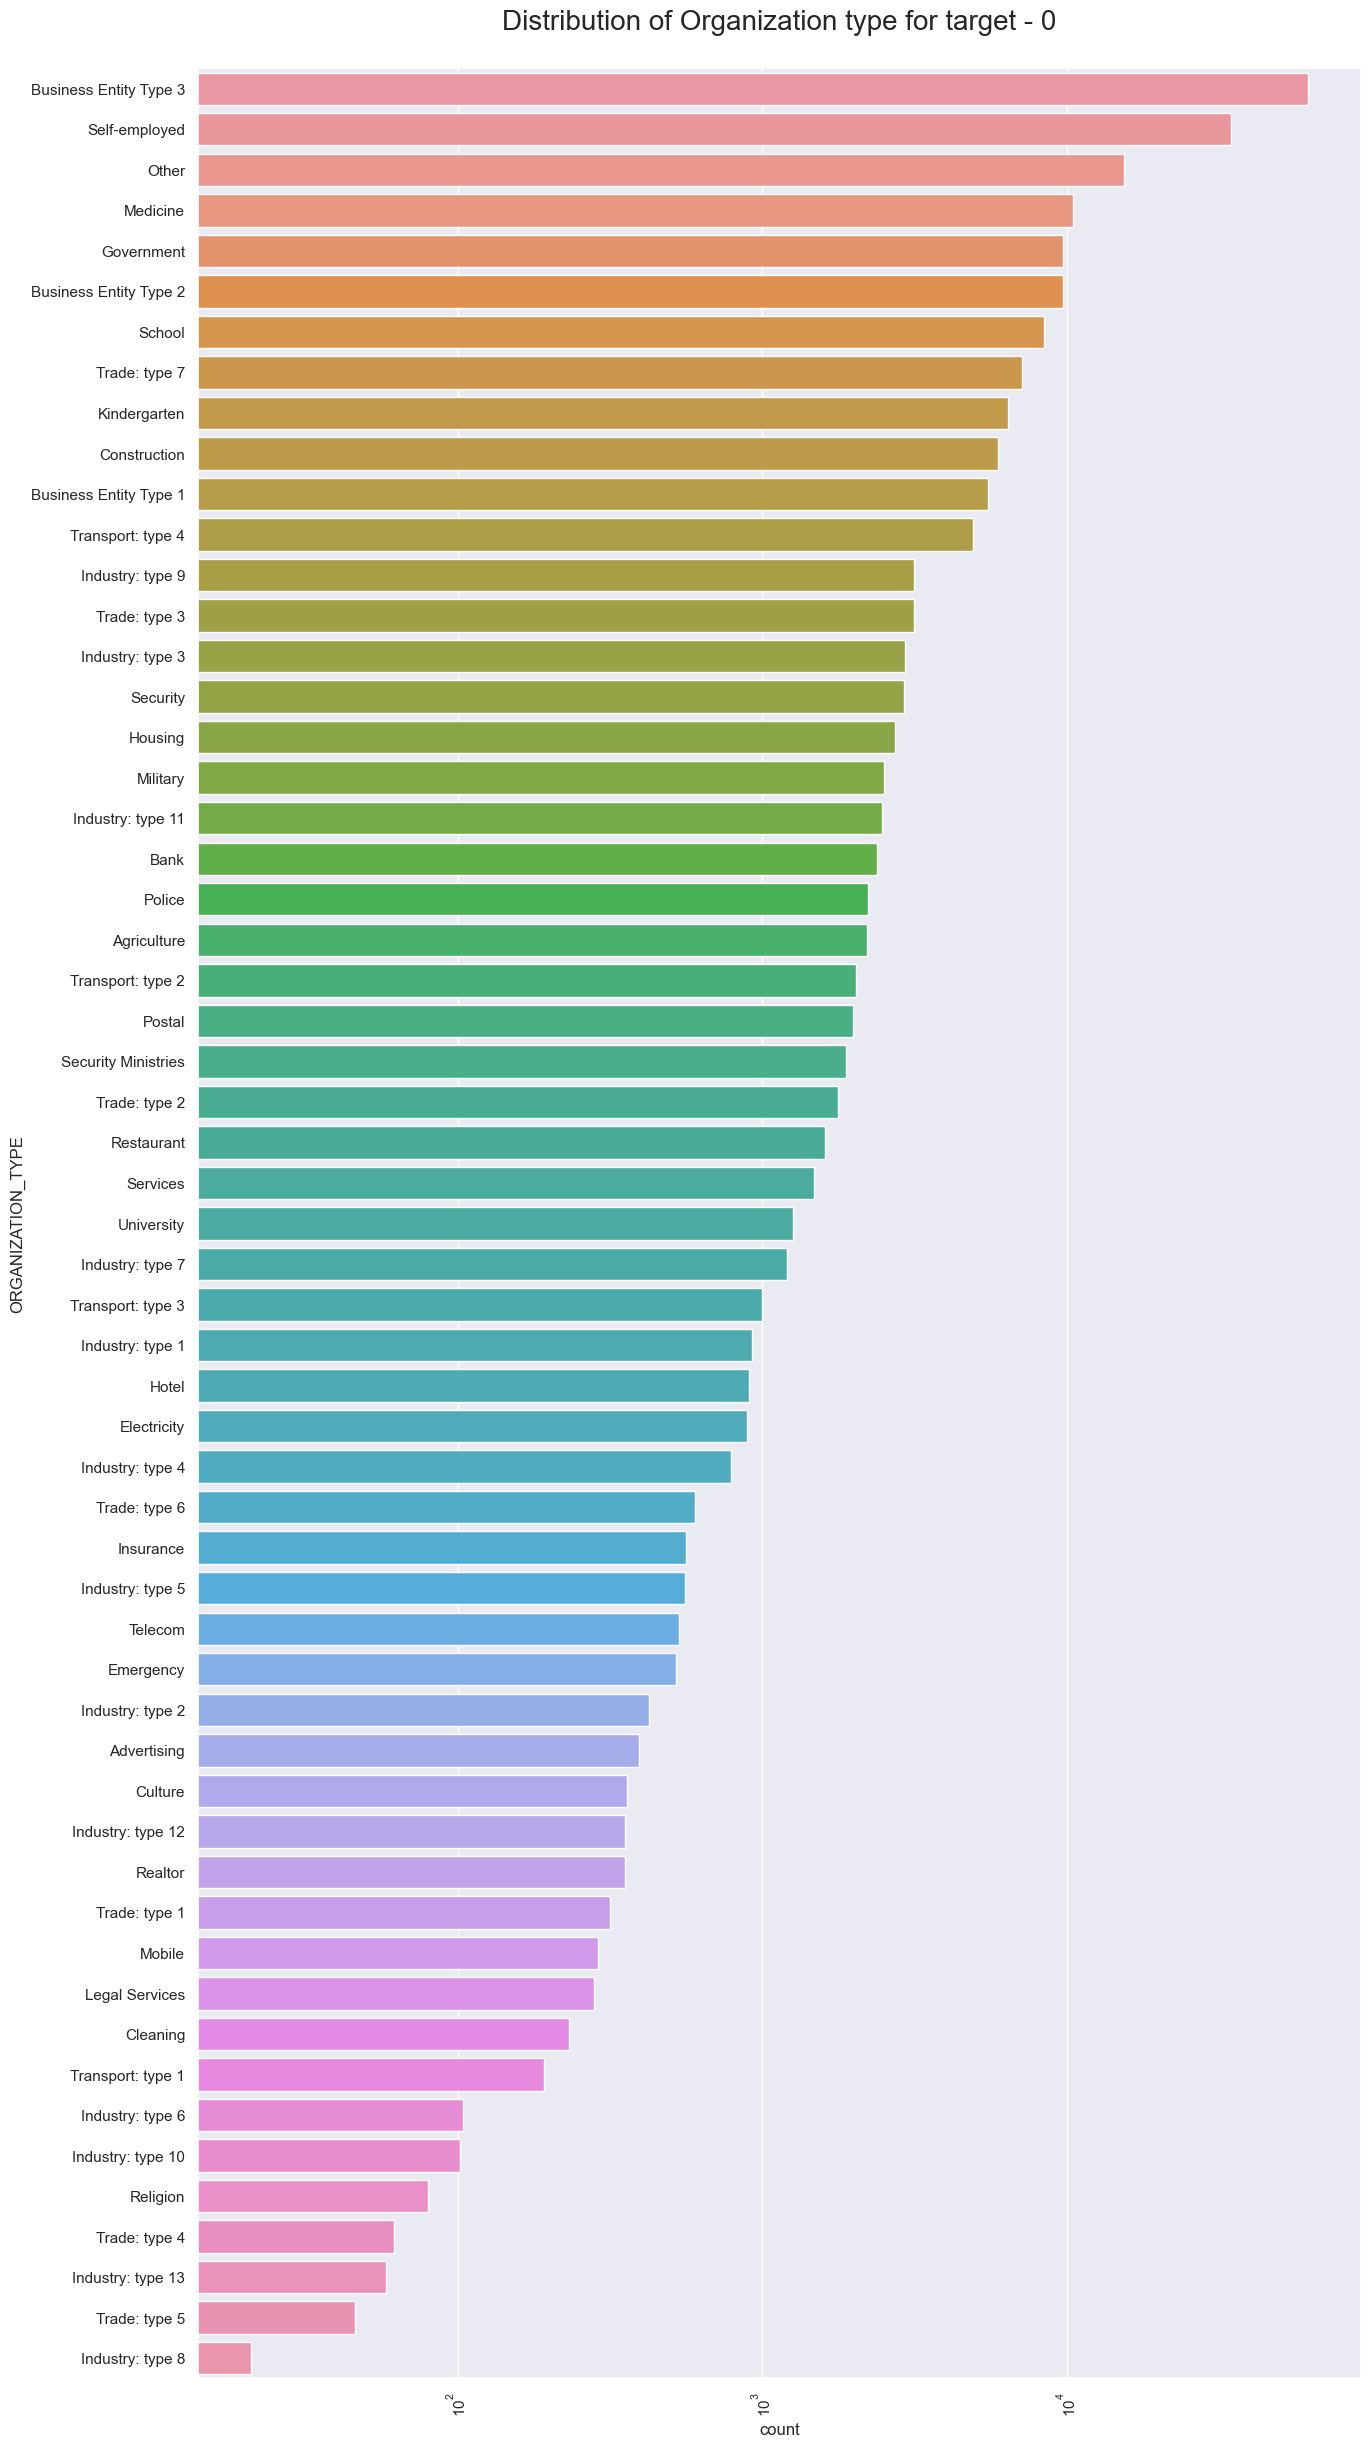

In [128]:
sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 28

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target_0,y='ORGANIZATION_TYPE',order=target_0['ORGANIZATION_TYPE'].value_counts().index)

plt.show()

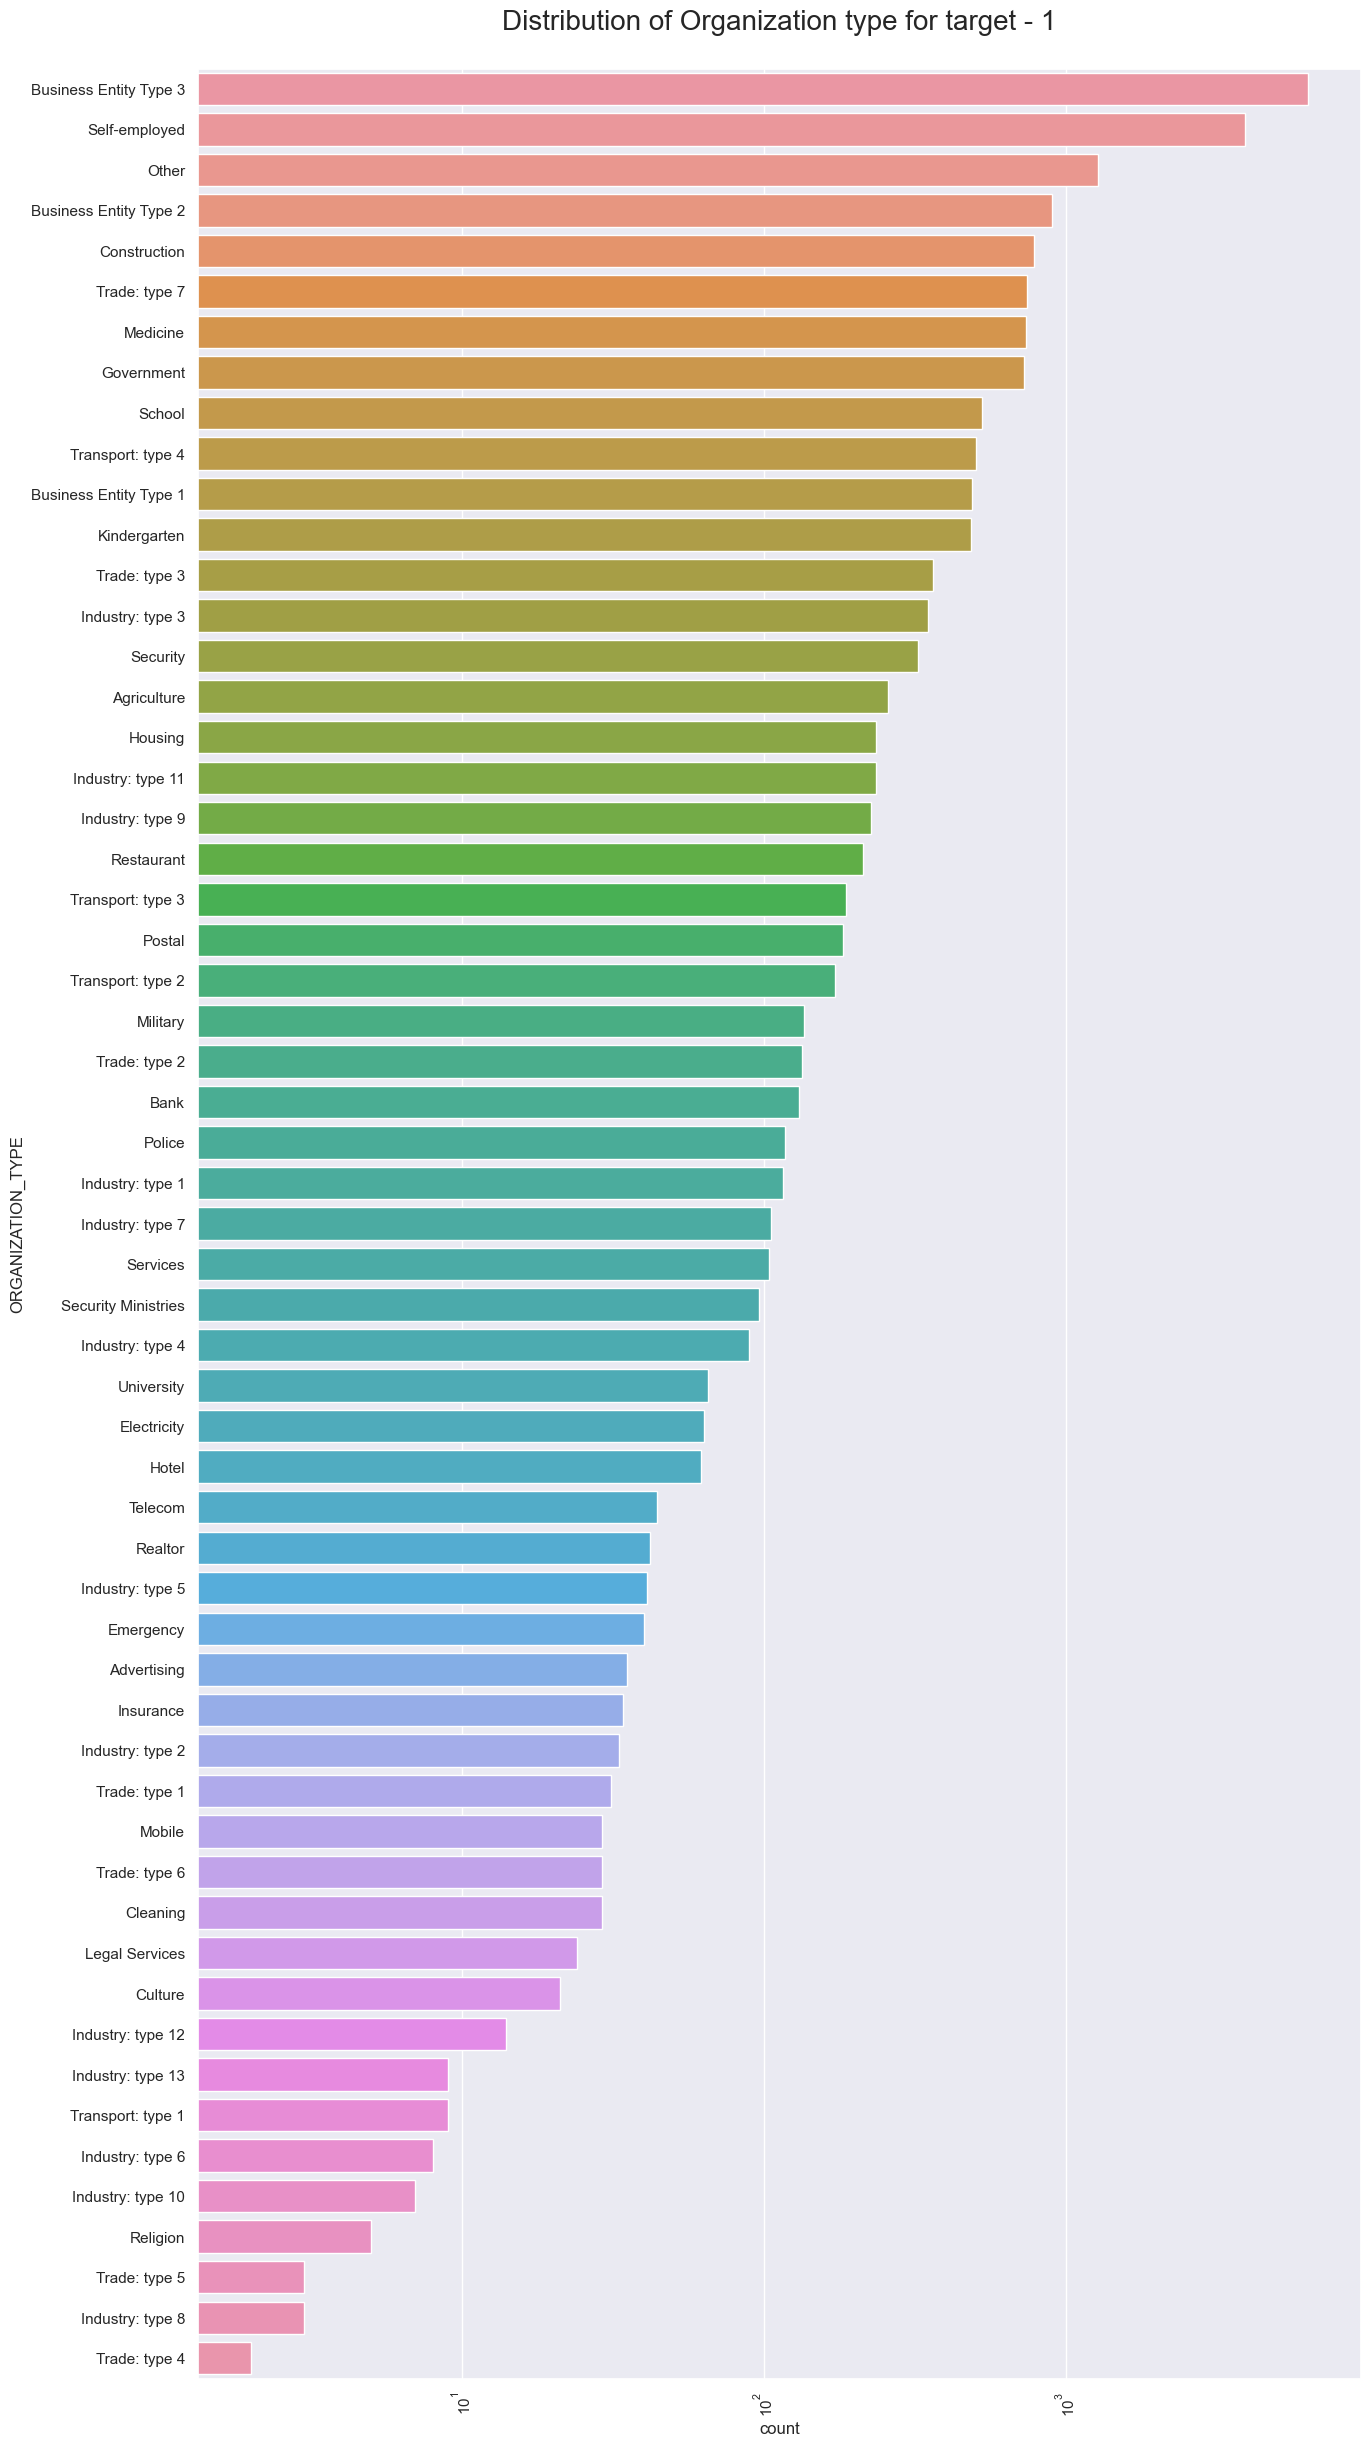

In [129]:
sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 28

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')


sns.countplot(data=target_1,y='ORGANIZATION_TYPE',order=target_1['ORGANIZATION_TYPE'].value_counts().index)

plt.show()

# Bivariate Analysis

# Numerical-Numerical Bivariate Analysis

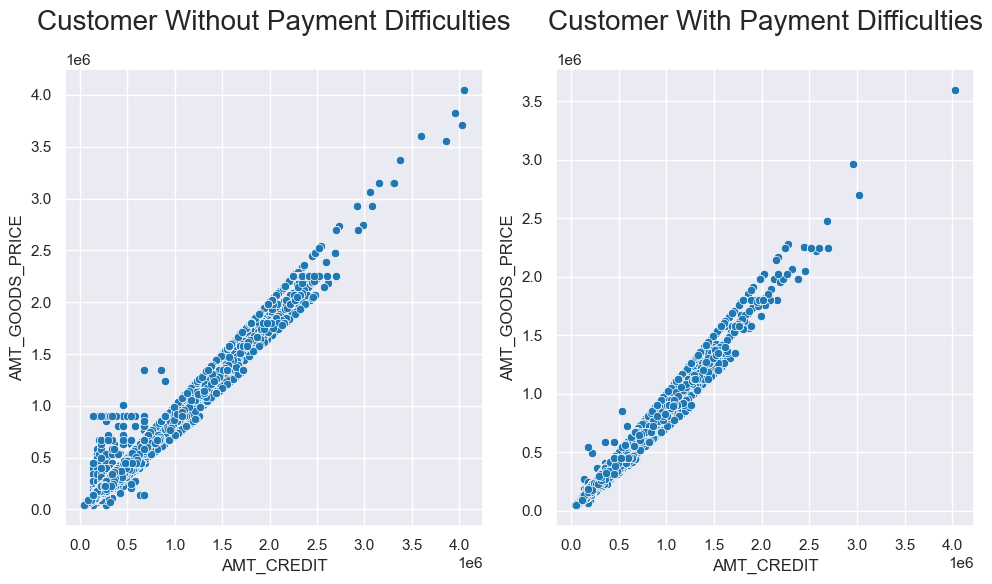

In [130]:
## Analysis of AMT_CREDIT and AMT_GOODS_PRICE in bivariate
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=target_0,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer Without Payment Difficulties')

plt.subplot(1,2,2)
sns.scatterplot(data=target_1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer With Payment Difficulties')
plt.tight_layout()


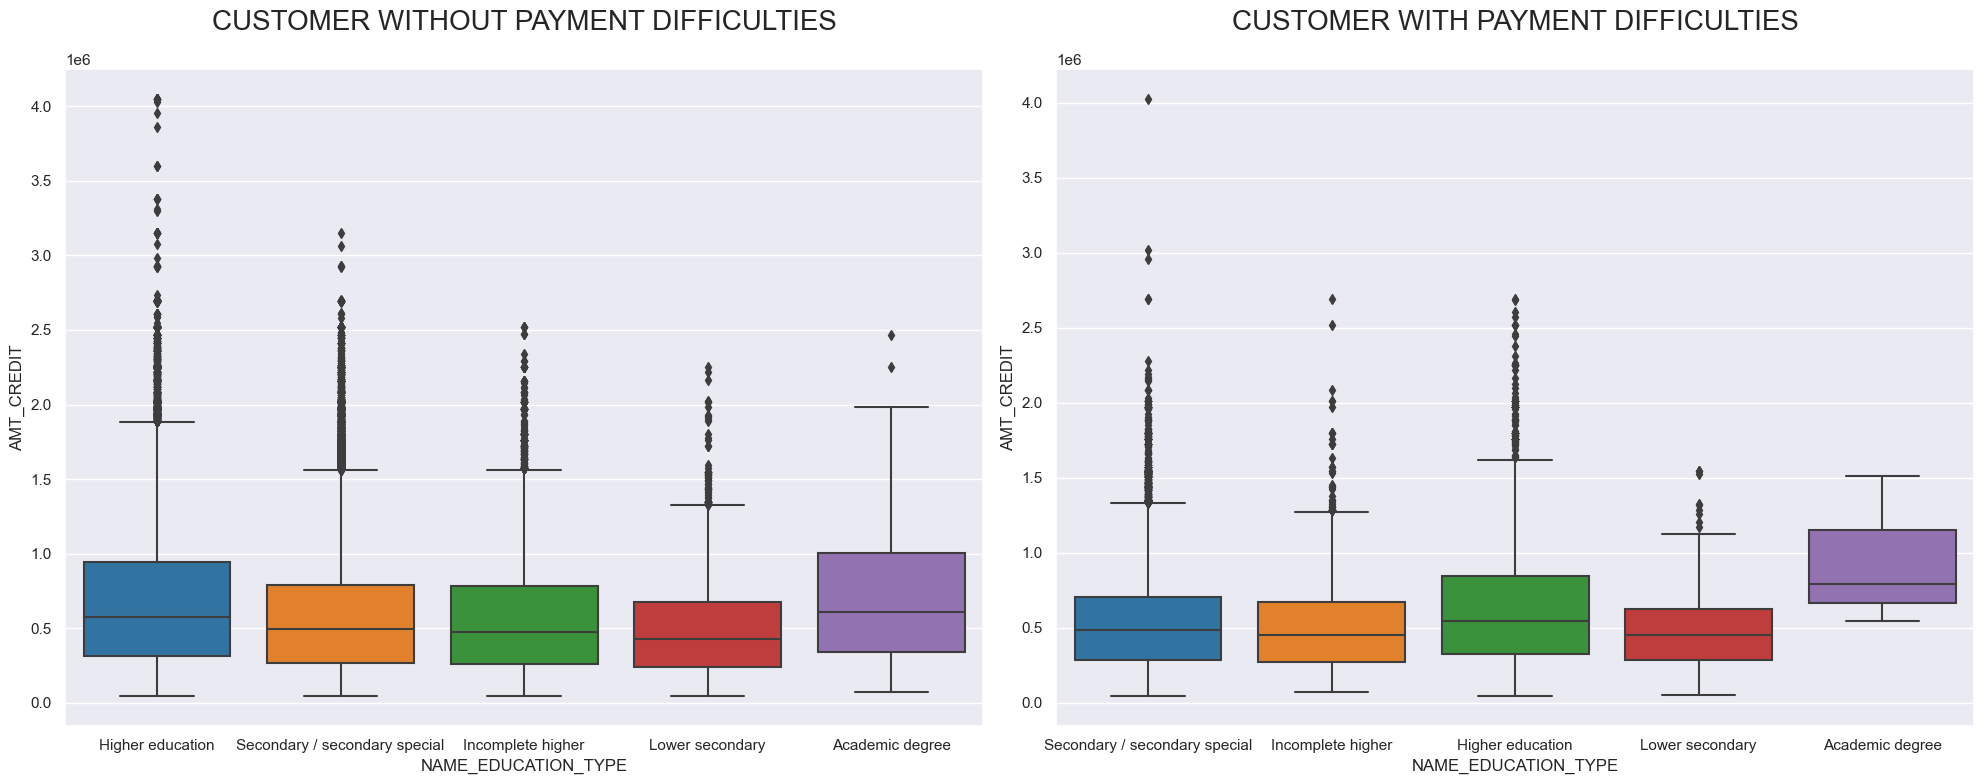

In [131]:
## ## Bivaraite Analysis using boxplot
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=target_0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('CUSTOMER WITHOUT PAYMENT DIFFICULTIES')
plt.subplot(1,2,2)
sns.boxplot(data=target_1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('CUSTOMER WITH PAYMENT DIFFICULTIES')
plt.tight_layout()
plt.show()

# CODE-GENDER AND AMT-CREDIT_RANGE BIVARIALYSIS

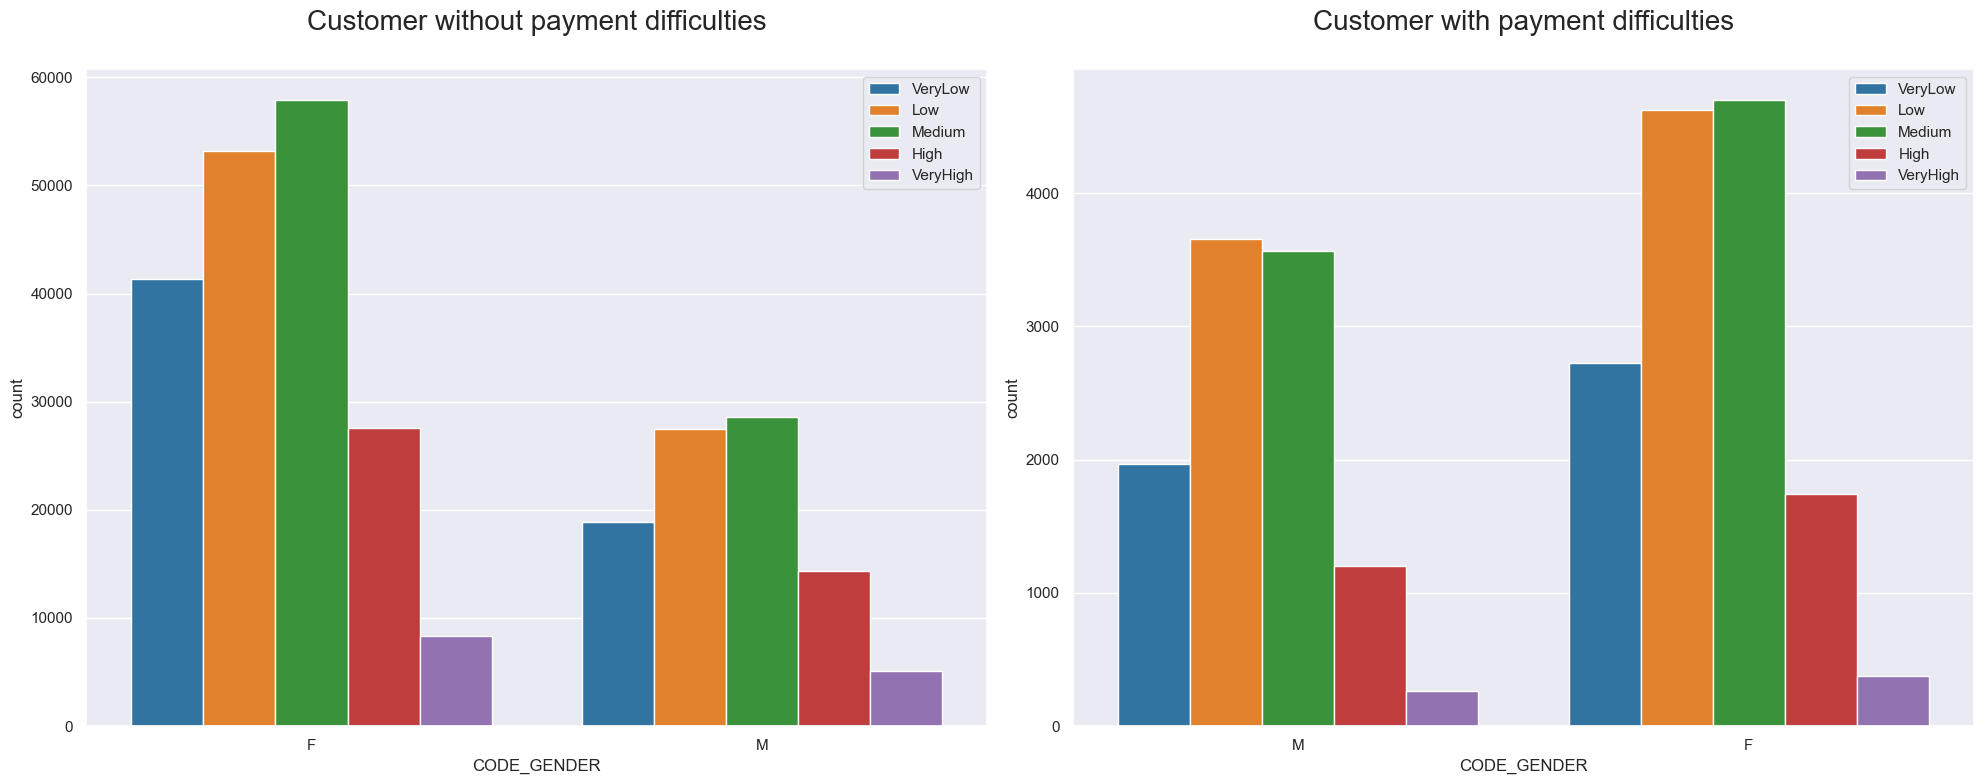

In [132]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=target_0,x='CODE_GENDER',hue='AMT_CREDIT_RANGE')
plt.legend(loc='upper right')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(data=target_1,x='CODE_GENDER',hue='AMT_CREDIT_RANGE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

# AMT_CREDIT AND OCCUPATION_TYPE BIVARIALYSIS

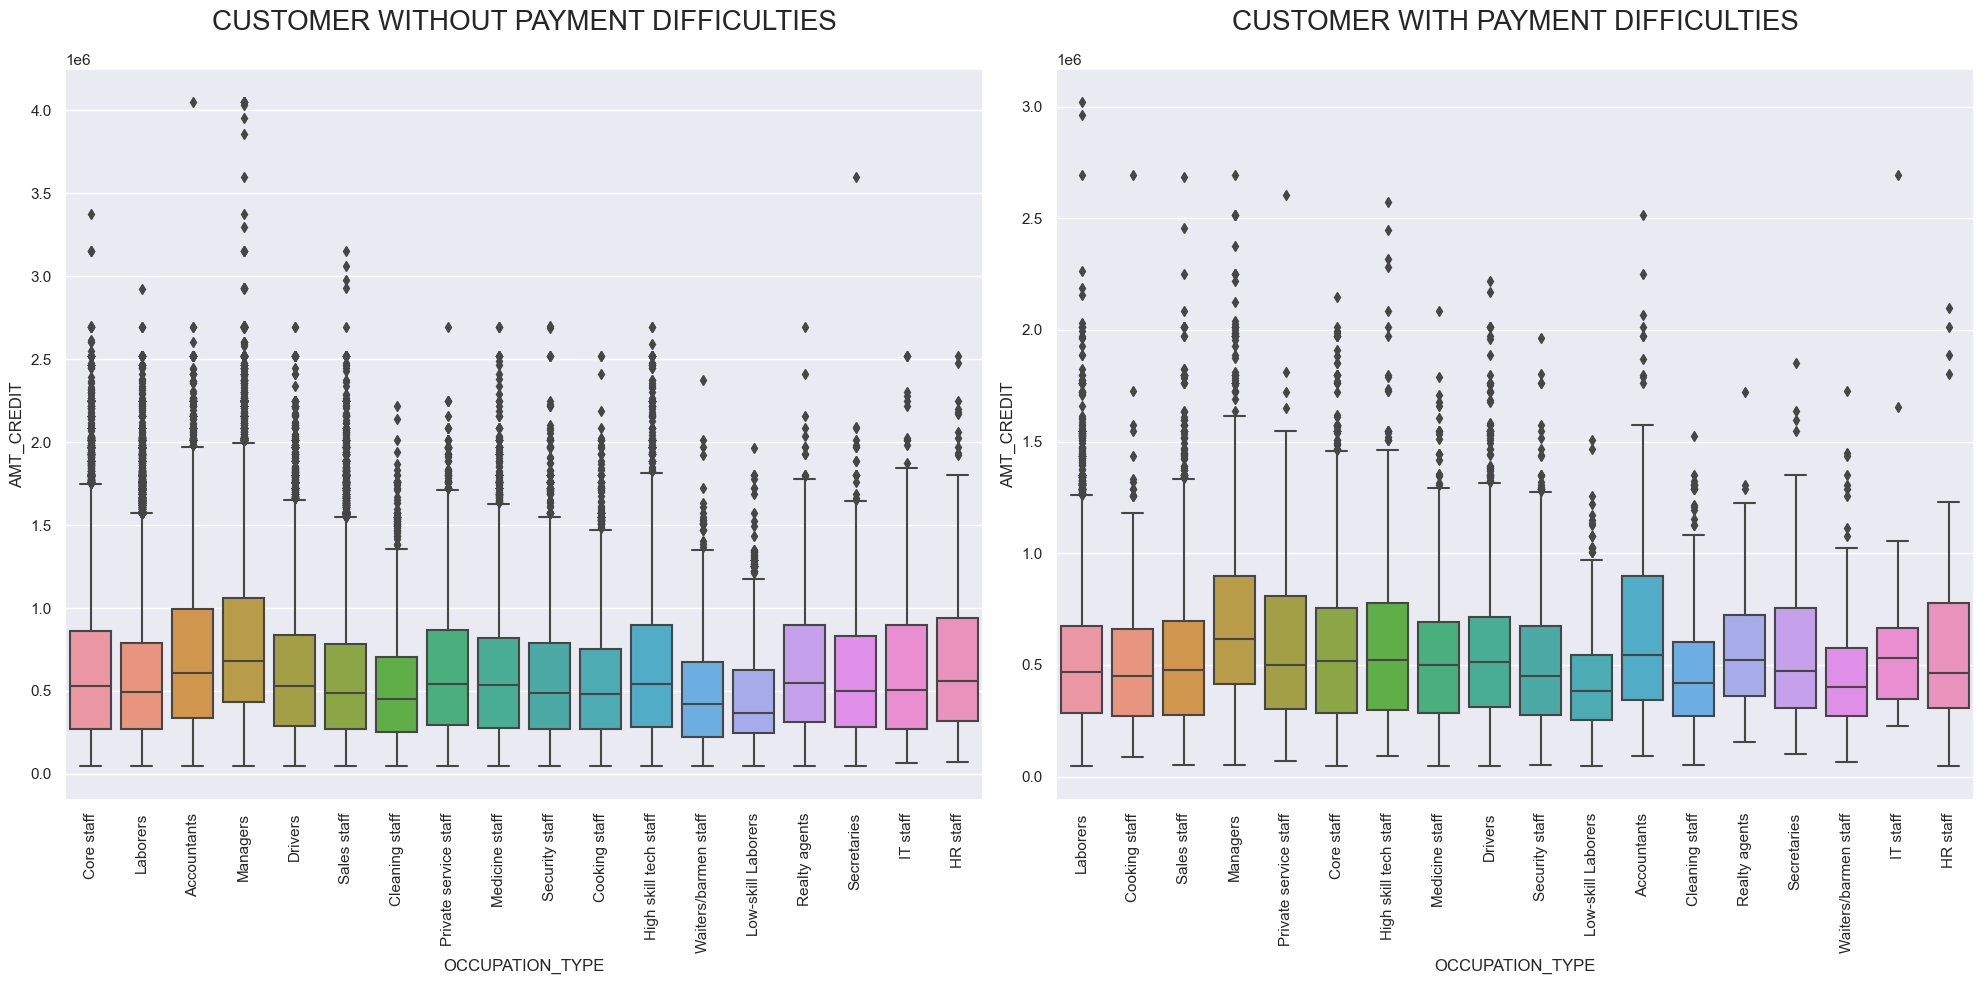

In [133]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=target_0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.title('CUSTOMER WITHOUT PAYMENT DIFFICULTIES')

plt.subplot(1,2,2)
sns.boxplot(data=target_1,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('CUSTOMER WITH PAYMENT DIFFICULTIES')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

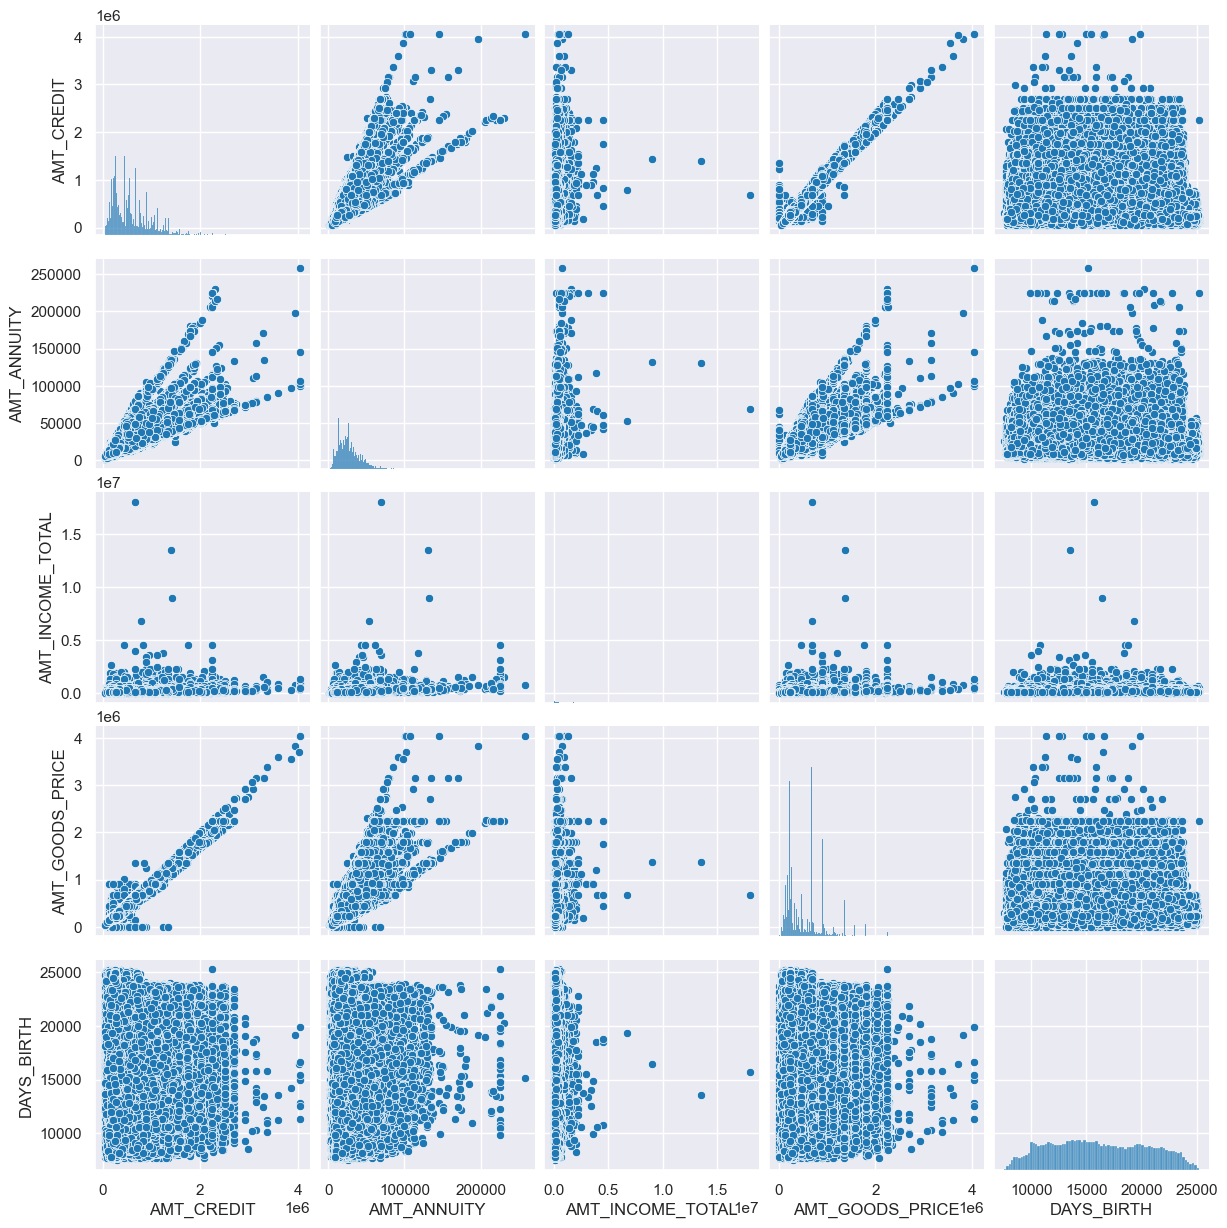

In [134]:
pairPLOT = target_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pairPLOT)

plt.show()

# Categorical-Numerical

In [135]:
df_1.groupby("FLAG_OWN_REALTY")['AMT_ANNUITY'].mean()

FLAG_OWN_REALTY
N    27222.318602
Y    27058.219952
Name: AMT_ANNUITY, dtype: float64

In [136]:
df_1.groupby("FLAG_OWN_REALTY")['AMT_ANNUITY'].median()

FLAG_OWN_REALTY
N    24903.0
Y    24903.0
Name: AMT_ANNUITY, dtype: float64

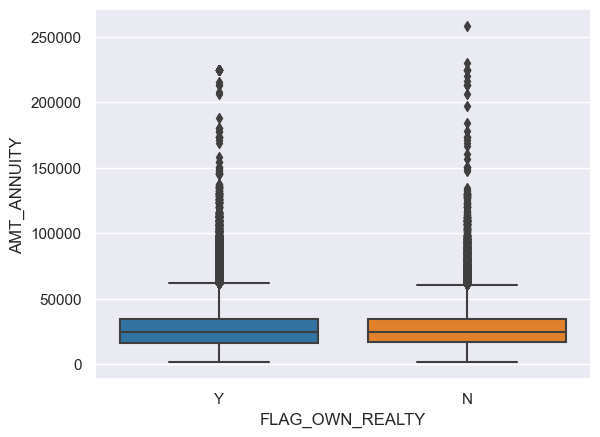

In [137]:
sns.boxplot(data=df_1, x="FLAG_OWN_REALTY", y="AMT_ANNUITY")
plt.show()

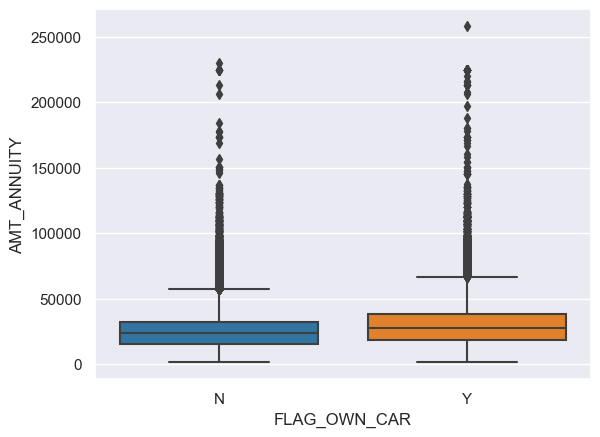

In [138]:
sns.boxplot(data=df_1, x="FLAG_OWN_CAR", y="AMT_ANNUITY")
plt.show()

# Categorical-Categorical

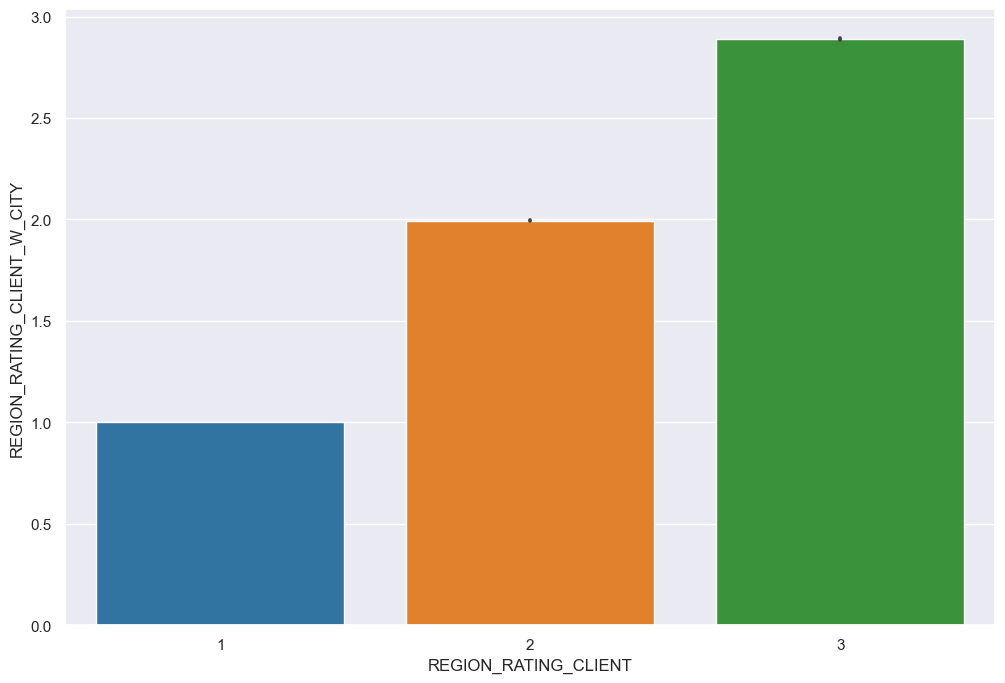

In [139]:
plt.figure(figsize=(12,8))
sns.barplot(x=target_0.REGION_RATING_CLIENT,y=target_0.REGION_RATING_CLIENT_W_CITY)
plt.show()

# CODE_GENDER AND Amt_Credit_Range BIVARIALYSIS

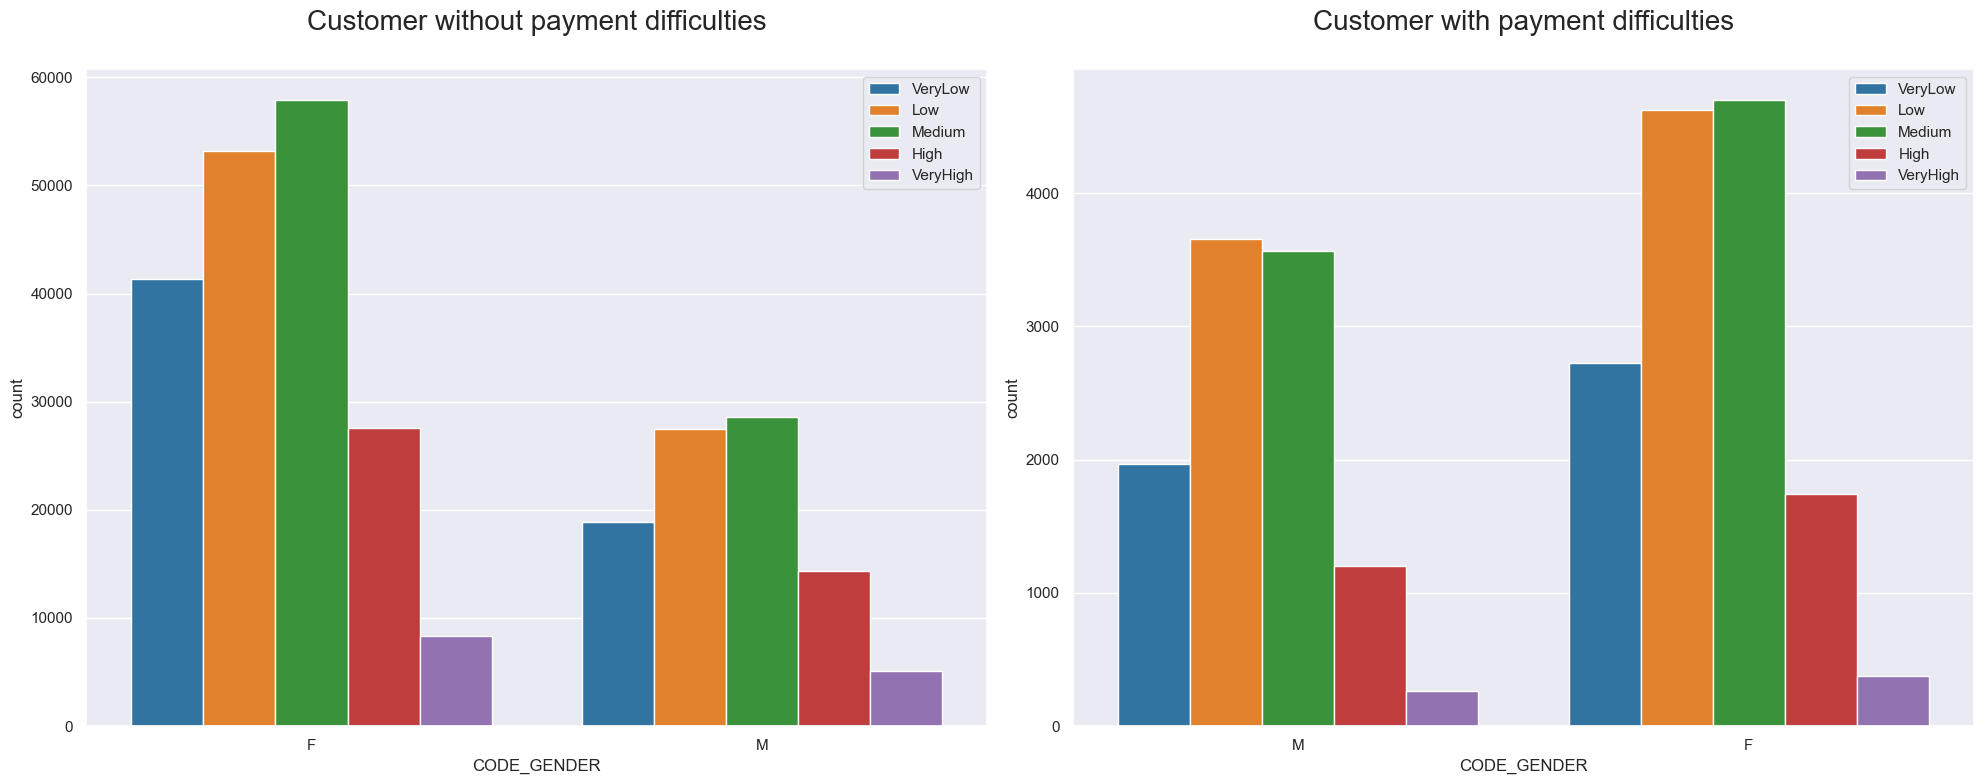

In [140]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=target_0,x='CODE_GENDER',hue='AMT_CREDIT_RANGE')
plt.legend(loc='upper right')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(data=target_1,x='CODE_GENDER',hue='AMT_CREDIT_RANGE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

# Operation and analysis on the dataset from the previous application.

In [141]:
df_2=pd.read_csv("previous_application.csv")

In [142]:
df_2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [143]:
df_2.shape

(1670214, 37)

In [144]:
df_2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [145]:
df_2.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [146]:
df_2.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [147]:
df_2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

# Now, determining which columns are categorical or numerical so that we can perform an operation on them. If the columns are numerical, it is preferable to fill in any missing values using the median, and if they are categorical, we may use the mode.

In [148]:
list(set(df_2.columns) - set(df_2.describe().columns))

['PRODUCT_COMBINATION',
 'NAME_YIELD_GROUP',
 'NAME_GOODS_CATEGORY',
 'NAME_SELLER_INDUSTRY',
 'NAME_TYPE_SUITE',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CLIENT_TYPE',
 'NAME_PORTFOLIO',
 'NAME_PAYMENT_TYPE',
 'NAME_CONTRACT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PRODUCT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'CHANNEL_TYPE',
 'NAME_CONTRACT_STATUS']

In [149]:
df_2.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [150]:
# Checking the unique values 

In [151]:
df_2.NAME_CLIENT_TYPE.unique()

array(['Repeater', 'New', 'Refreshed', 'XNA'], dtype=object)

In [152]:
df_2.CHANNEL_TYPE.unique()

array(['Country-wide', 'Contact center', 'Credit and cash offices',
       'Stone', 'Regional / Local', 'AP+ (Cash loan)',
       'Channel of corporate sales', 'Car dealer'], dtype=object)

In [153]:
df_2.NAME_PORTFOLIO.unique()

array(['POS', 'Cash', 'XNA', 'Cards', 'Cars'], dtype=object)

# Data Cleaning

In [154]:
df_2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [155]:
Null_Values=100*df_2.isnull().mean()

In [156]:
## After looking at the columns' missing values, we can notice that several columns, 
## such as RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED, have missing values.

## are more than 99 percent null, yet columns like DAYS_FIRST_DRAWING and DAYS_FIRST_DUE 
##have the same percentage of empty entries.



In [157]:
df_2.RATE_INTEREST_PRIMARY.value_counts(normalize=True)*100

0.189136    20.467148
0.142440    15.980507
0.160716    13.796001
0.193330    11.443455
0.196900     9.628634
0.176003     4.049740
0.189122     3.528819
0.160702     3.427995
0.182818     3.142329
0.196914     2.335742
0.179687     1.243488
0.193344     1.159469
0.059135     1.025038
0.142454     0.941018
0.696178     0.789783
0.142143     0.520921
0.179701     0.470509
0.182832     0.352882
0.127834     0.285666
0.191757     0.285666
0.193316     0.268862
0.189151     0.252058
0.696319     0.201647
0.700810     0.184843
0.654511     0.168039
0.696333     0.151235
0.141732     0.134431
0.654568     0.134431
0.176017     0.117627
0.142426     0.100823
0.635951     0.100823
0.175989     0.100823
0.207597     0.100823
0.207582     0.100823
0.207554     0.084019
0.635937     0.084019
0.636022     0.084019
0.696163     0.084019
0.196886     0.067216
0.207625     0.067216
0.174714     0.067216
0.189108     0.067216
0.207568     0.067216
0.695668     0.050412
0.696192     0.050412
0.183554  

In [158]:
df_2.RATE_INTEREST_PRIMARY.isnull().sum()

1664263

In [159]:
## Now The fact that the minimum value and greatest value are so drastically different indicates that 
##the column contains outliers.

In [160]:
Null_Values=df_2.isnull().sum()/len(df_2)*100
Null_Values=Null_Values[Null_Values.values>50.0]
print(Null_Values)

AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
dtype: float64


In [161]:
## We will disregard these numbers since, as we can see in this dataset, there are only 4 values that are greater than 50%.

In [165]:
df_2.drop(labels=Null_Values,axis=1,inplace=True)
print(len(Null_Values))

4


In [167]:
df_2.shape

(1670214, 33)

In [170]:
Null_Values=df_2.isnull().sum()/len(df_2)*100
Null_Values=Null_Values[Null_Values.values>15.0]
print(Null_Values)

AMT_ANNUITY                  22.286665
AMT_GOODS_PRICE              23.081773
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64


# Combining two Data Sets

In [172]:
credit_df = pd.merge(df_1, df_2, how='inner', on='SK_ID_CURR')
credit_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  

In [173]:
credit_df.shape

(1413701, 115)

In [174]:
credit_df['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

# After integrating the data, we see that a significant portion of the loans are authorized, and we may disregard the small portion of unused offers.

In [178]:
approved_df =credit_df[credit_df['NAME_CONTRACT_STATUS']=='Approved']
refused_df = credit_df[credit_df['NAME_CONTRACT_STATUS']=='Refused']
canceled_df=credit_df[credit_df['NAME_CONTRACT_STATUS']=='Canceled']
unused_df=credit_df[credit_df['NAME_CONTRACT_STATUS']=='Unused offer']

# Univariate Analysis For previous_application Dataset

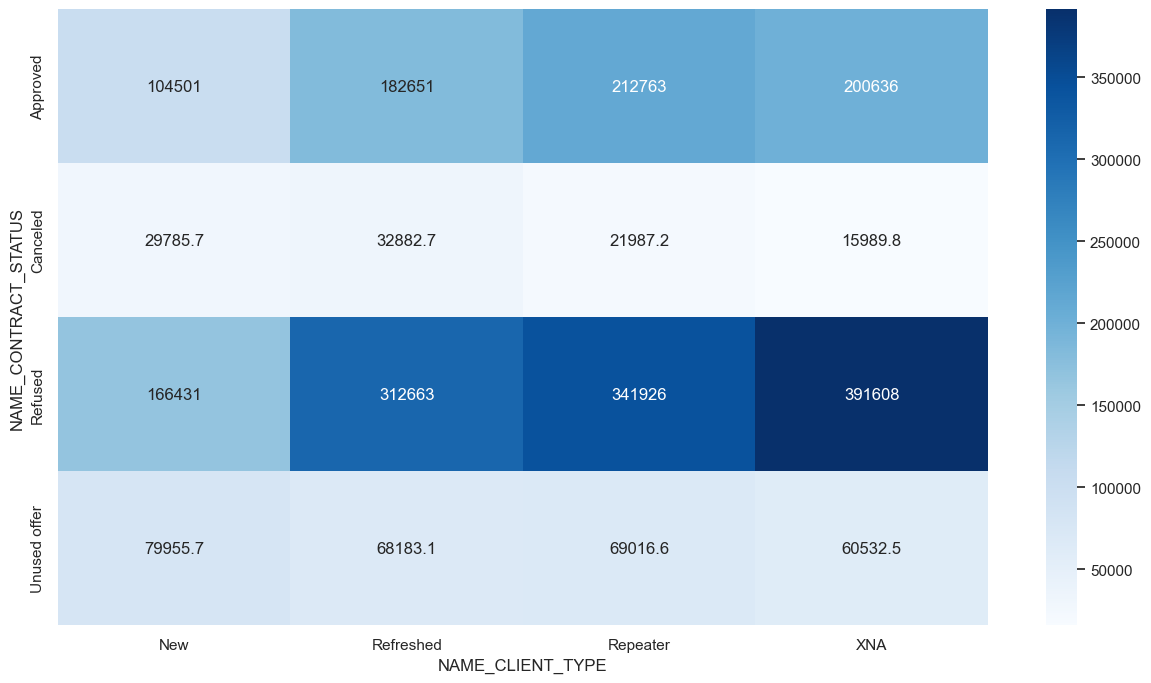

In [179]:
prev=pd.pivot_table(data=df_2, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(prev, annot=True,cmap='Blues', fmt="g")
plt.show()

In [180]:
## This particular discovery leads us to the conclusion that a large number of applications are being rejected,
## maybe for reasons related to poor credit history or any other cause for late payments.

# Observation: It is clear from the heatplot above that the intensity of applications that are rejected is fairly high and that there are relatively few unused offers, while the authorized section operates with an average perspective.

<Figure size 2000x800 with 0 Axes>

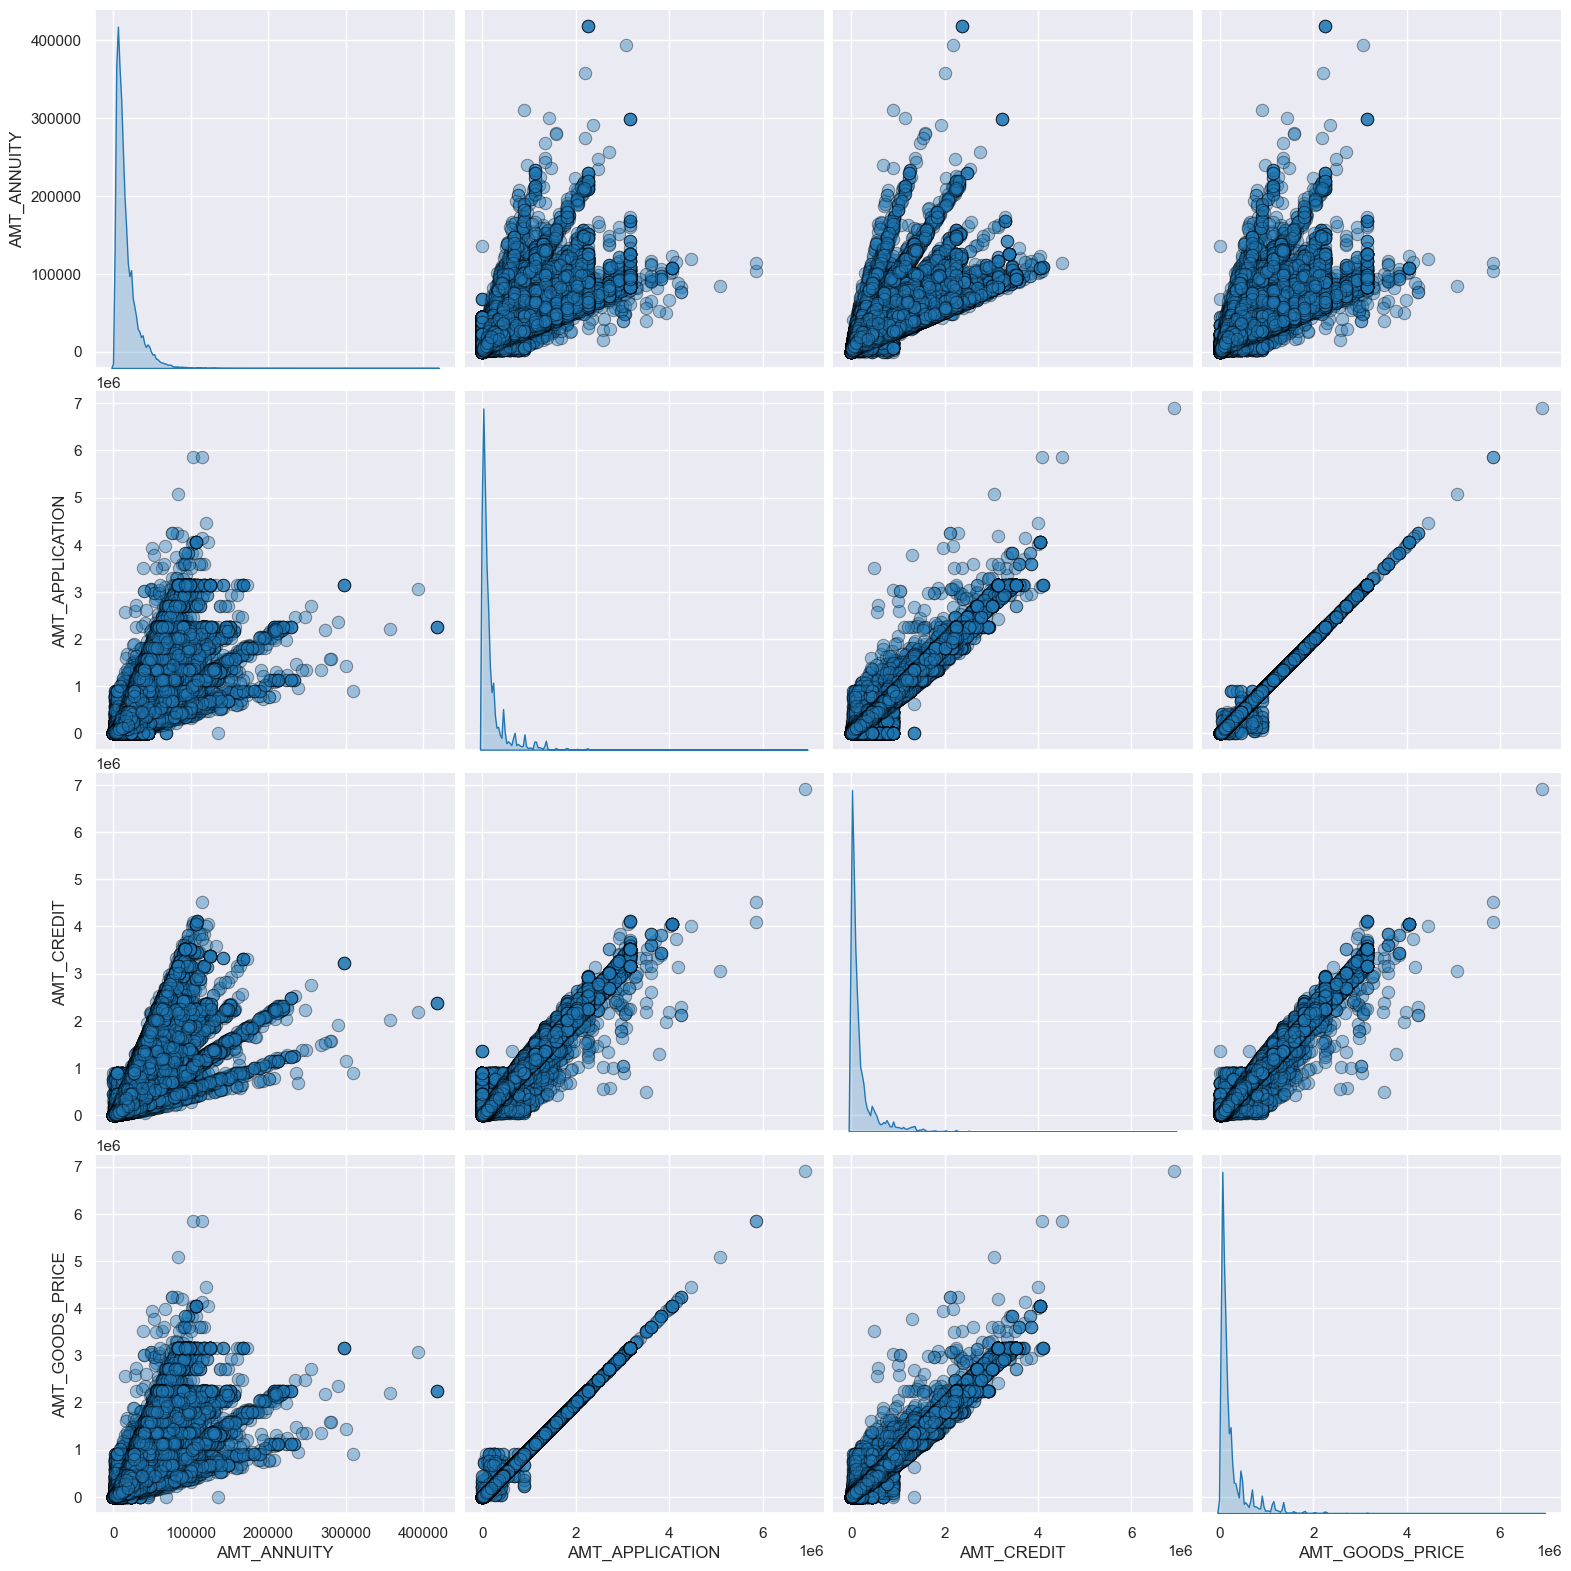

In [181]:
plt.figure(figsize=[20,8])
sns.pairplot(df_2[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

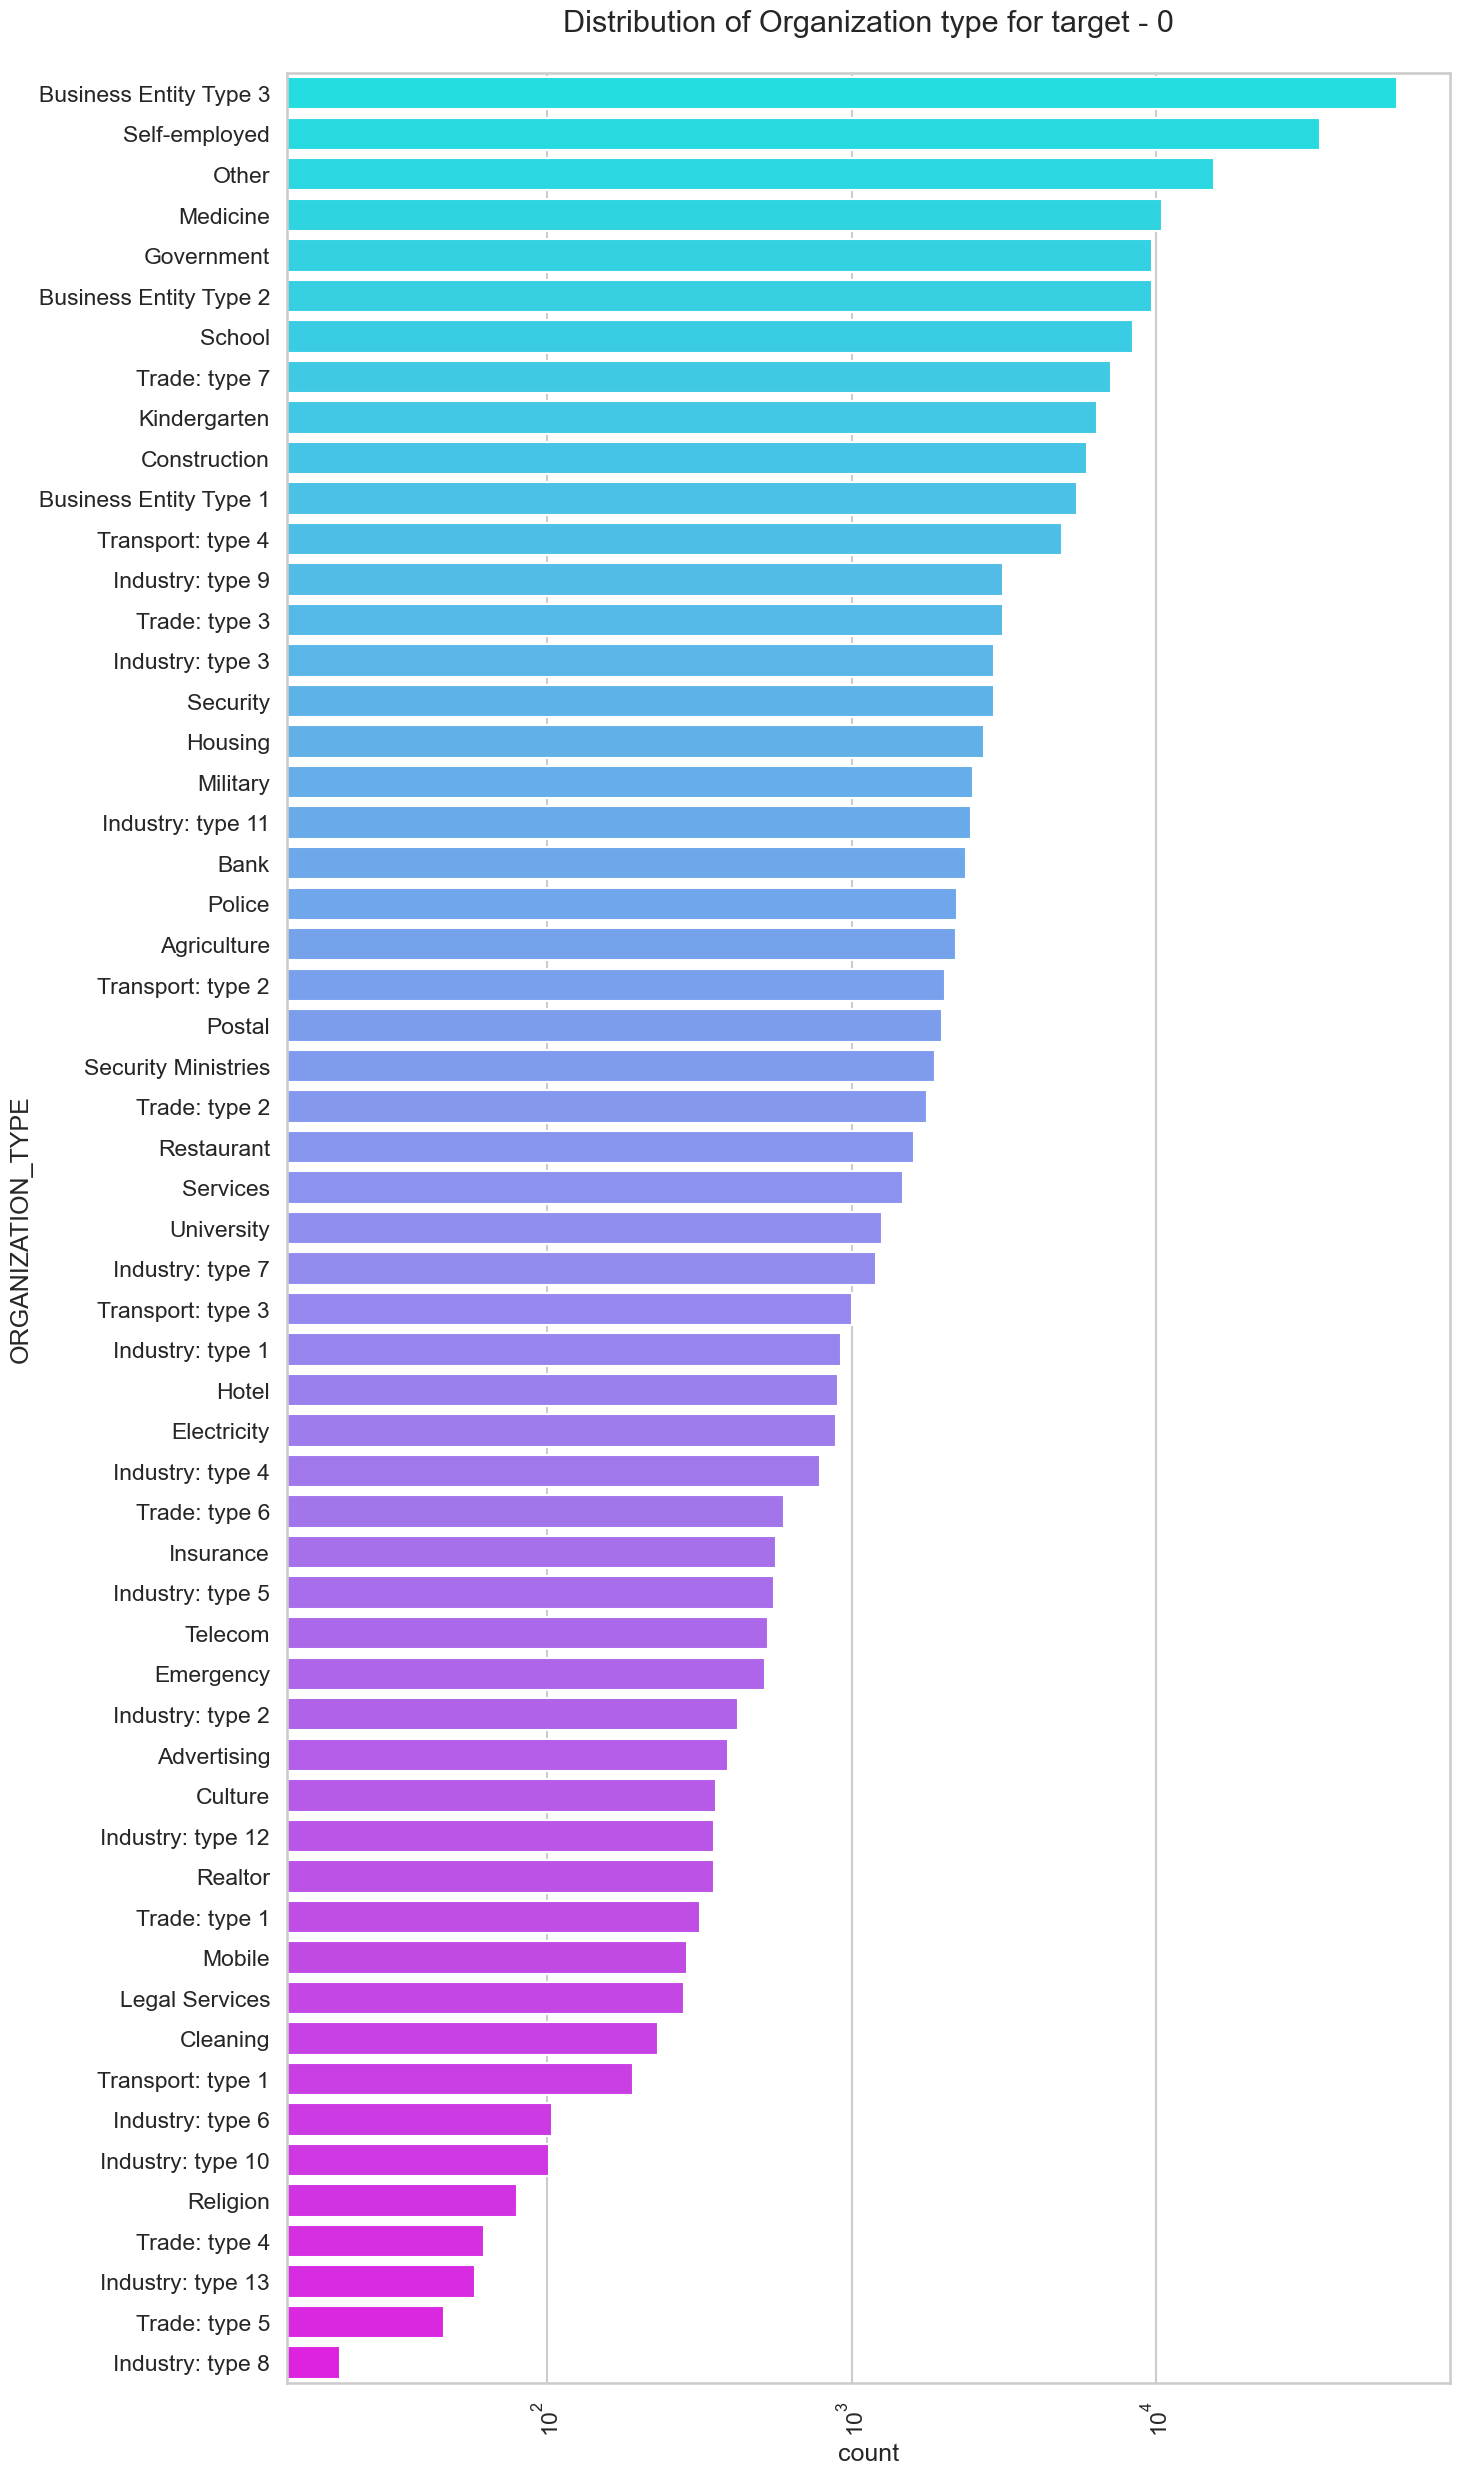

In [182]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target_0,y='ORGANIZATION_TYPE',order=target_0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

# Analysis Of Bivariate Data For NAME_FAMILY_STATUS

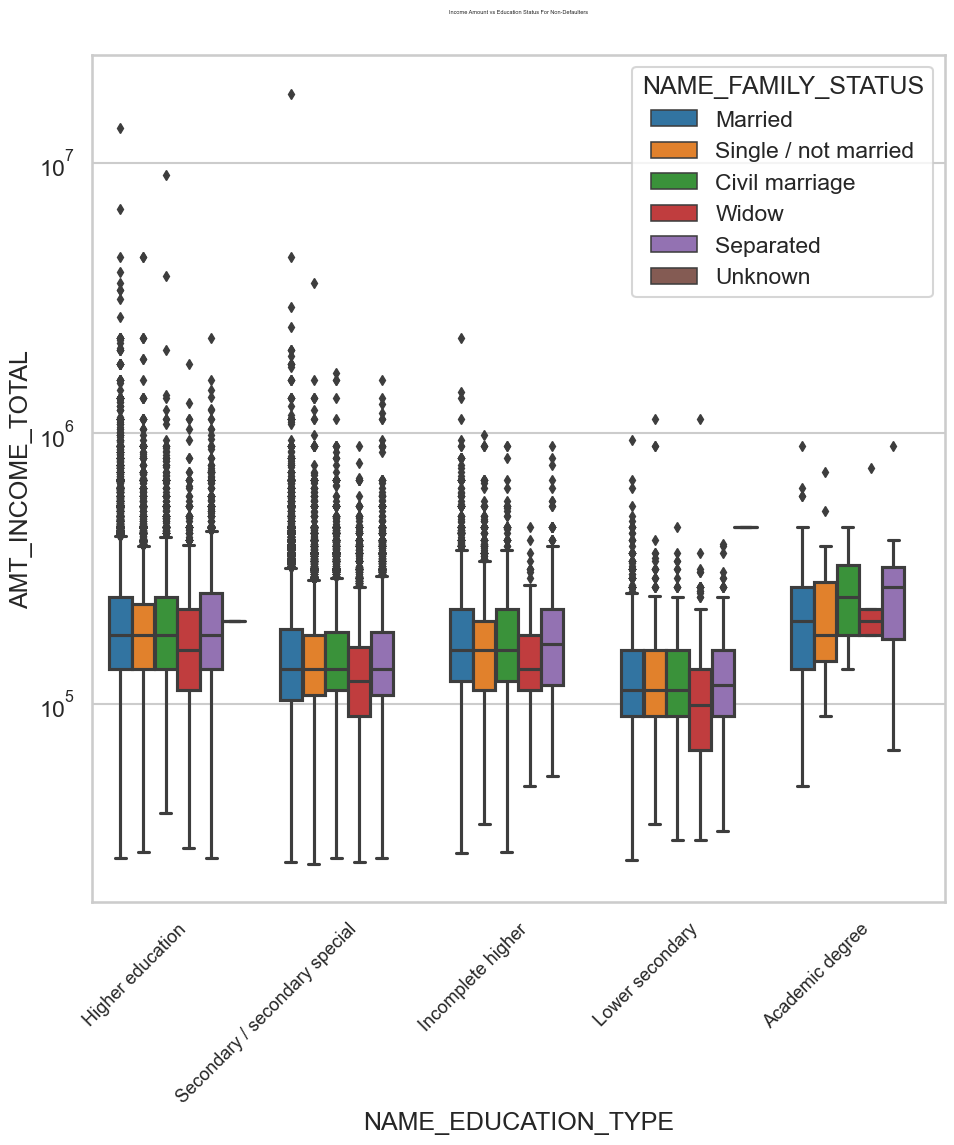

In [183]:
plt.figure(figsize=(11,11))
plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=13)
plt.yscale('log')
g1=sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status For Non-Defaulters',fontsize=4)
plt.show()

# Conclusion


# We arrive at the following results after conducting the whole analysis on both datasets:

# 1. It is not a good for performance for Bank to deal in a large percentage of cash loans and a very little number of revolving loans.

# 2. Only 8% of the bank's loans are in default, which also means that 92% of the loans have been repaid.

# 3. The relationship between AMT_CREDIT, AMT_ANNUITY, and AMT_GOODS_PRICE is quite strong.

# 4. Laboures have requested the most loans, while IT personnel has requested the least.

# 5. People who rent flats make up a large portion of those who apply for loans. 

# 6. When compared to canceled, rejected, or underused bids, the value of a contract that has been granted is substantially higher.

# 7. The top 2 organization types that applied and cleared the loans were Business Entity Type 3 and Self Employed.

# 8. Bank can target  women for more business.